# PHAS0030: Computational Physics: Mini-Project: Ant Optimisation:
## (Go to the Ant .... Consider her Ways and be Wise)
#### SN:19052055

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import time
from IPython.display import clear_output

In [2]:
# Code adapted from "PHAS0007 Script for session 5: Notebook 1 (of 2)",(Dash and Lemos, 2019) {3}
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
Hides code for easier viewing, Toggle code boxes <a href="javascript:code_toggle()">here</a>.''')

## Introduction:
This is the lab book for ant colony simulation to find the shortest path. Ants achieve organisation and cooperation using chemical signals and very simple rules. This project begins by exploring how those signals and rules can solve a problem in the ant world, and then goes on to try to solve a problem in the commercial world.

We start with the basic code I will:
- Define a region, conveniently set up as a rectangular grid of square blocks

- Define a nest site and a food source in the region

- Initially, define two allowed paths through the region between nest and food

- Set the pheromone levels in all the blocks to zero

- Release the ants and advance time click by click:

At each tick of the clock, each ant moves one space;
- If there is a choice of moves, pick where to go either probabilistically or simply by choosing the strongest pheromone signal

- I'll avoid backward steps either by an angular weighting function or by disallowing a move to the place the ant was at the last go to the ant 2 tick of the clock – with suitable modification if the ant is at the food source or back at the nest

- Increase the level of pheremone in the block the ant steps to;

- Before the next tick of the clock, reduce the pheromone levels of every block by a factor, say 0.9. You should investigate other ’evaporation rates’.

## Initial Code: 2 Paths Problem:

### Days: 23/01/21-30/01/21: Initial Set up and tests

#### Setting up grid
- I try set up a grid and plot it for visuals. I uses 2D arrays, and `np.zeros` function. I compared  the utility of `plt.imshow` vs `plt.pcolor`

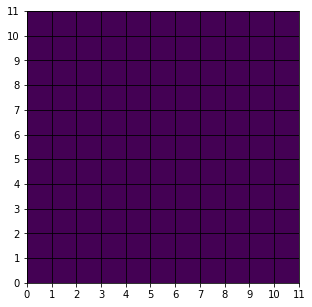

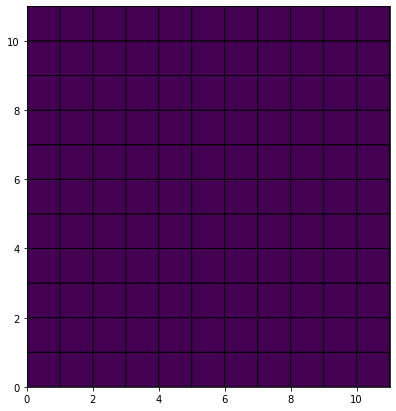

In [4]:
# 23/01/21

# Grid variables to avoid hard coding
grd_x= 11
grd_y= 11

grid= np.zeros([grd_y,grd_x])

# Plot grid using imshow
fig, ax= plt.subplots(1, 1, figsize=(15,5)) 
im= ax.imshow(grid, origin= 'bottom', extent= (0,grd_x,0,grd_y))

ax.grid(color='k')
ax.set_xticks( np.arange(0, grd_x+1) )
ax.set_yticks( np.arange(0, grd_y+1) )

plt.show()

# Plot using pcolor
fig, ax= plt.subplots(1, 1, figsize=(6.5,7)) 
im= ax.pcolor(grid, edgecolors='k', linewidths=1)
plt.show()

#### Looping on grid
- I try arbitrary loop to test looping on arrays and interactive plot, as plan to have function that updates value on grid based on ants behaviour

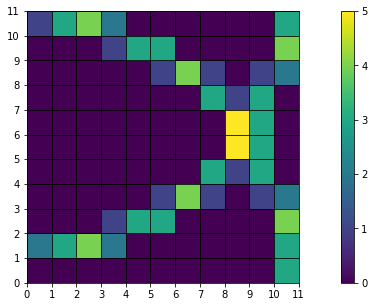

In [5]:
# 23/01/21

# Initialising grid and variables
grd_x= 11
grd_y= 11

grid= np.zeros([grd_y,grd_x])

dt=0.001
t_T=100
t=0

# Loop over time
while t<t_T:
    t+= 1
    
    # Set arbitary value to each pos over time
    i= round((grd_x-1)*np.cos(np.pi*t/100)).astype(int)
    j= round((grd_y-1)*np.sin(np.pi*t/100)).astype(int)
    grid[i,j]+=1
    
    # Clears plot
    clear_output(wait=True)
    
    # Plots grid each step
    fig, ax= plt.subplots(1, 1, figsize=(15,5)) 
    im= ax.imshow(grid, origin= 'bottom', extent= (0,grd_x,0,grd_y))
    ax.grid(color='k')
    ax.set_xticks( np.arange(0, grd_x+1) )
    ax.set_yticks( np.arange(0, grd_y+1) )
    cbar= fig.colorbar(im)
    
    
    plt.draw()
    plt.pause(dt)

#### Adding decay rate
- Testing implimentation of decay/diffusion rate, using a loop to minus a set value each time step, this could be troublesome if it goes below zero, have possible else loop to deal with this

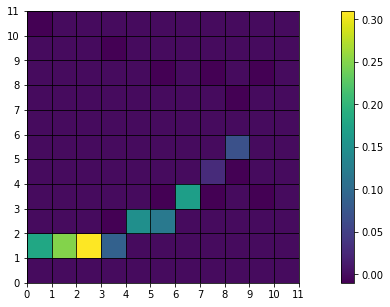

In [6]:
# 23/01/21

# Initialising grid and variables
grd_x= 11
grd_y= 11

grid= np.zeros([grd_y,grd_x])

dt=0.001
t_T=100
t=0

# Pheromone value 
phero=0.1

# Loop over time
while t<t_T:
    t+= 1
    
    # Set arbitary value to each pos over time
    i= round((grd_x-1)*np.cos(np.pi*t/100)).astype(int)
    j= round((grd_y-1)*np.sin(np.pi*t/100)).astype(int)
    grid[i,j]+= phero
    
    # Loop to adjust pheromone each step
    for i in range(grd_x):
        for j in range(grd_y):
            if grid[i,j]>0:
                grid[i,j]-=phero/10
            #else:
                #grid[i,j]=0
            
    clear_output(wait=True)
    
    fig, ax= plt.subplots(1, 1, figsize=(15,5)) 
    im= ax.imshow(grid, origin= 'bottom', extent= (0,grd_x,0,grd_y))
    ax.grid(color='k')
    ax.set_xticks( np.arange(0, grd_x+1) )
    ax.set_yticks( np.arange(0, grd_y+1) )
    cbar= fig.colorbar(im)
    
    
    plt.draw()
    plt.pause(dt)

#### Altering decay
Subtraction can cause errors, and was not accurate to model, switch to multiplying by factional factor

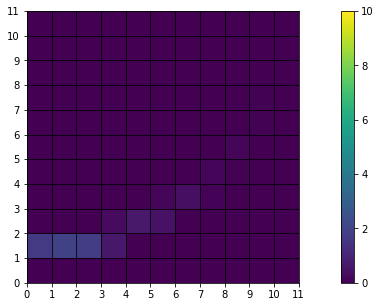

In [7]:
# 24/01/21

# Initialises variables
grd_x= 11
grd_y= 11

grid= np.zeros([grd_y,grd_x])

dt=0.001
t_T=100
t=0

# Variables regarding pheromone
phero=1
diff=9/10
pmax=10

while t<t_T:
    t+= 1
    
    # Arbitrary opperation
    i= round((grd_x-1)*np.cos(np.pi*t/100)).astype(int)
    j= round((grd_y-1)*np.sin(np.pi*t/100)).astype(int)
    
    # Operates on grid to update pheromones 
    if grid[i,j]< pmax*phero:
        grid[i,j]+= phero
    
    # Loops to update diffusion
    for i in range(grd_x):
        for j in range(grd_y):
            if grid[i,j]>0:
                grid[i,j]*=diff
            else:
                grid[i,j]=0
            
    clear_output(wait=True)
    
    # Plots grid
    fig, ax= plt.subplots(1, 1, figsize=(15,5)) 
    im= ax.imshow(grid, origin= 'bottom', extent= (0,grd_x,0,grd_y), vmin= 0, vmax= pmax*phero)
    ax.grid(color='k')
    ax.set_xticks( np.arange(0, grd_x+1) )
    ax.set_yticks( np.arange(0, grd_y+1) )
    cbar= fig.colorbar(im)
    
    
    plt.draw()
    plt.pause(dt)

#### Testing an ant array
- Setting up a array to indicate occupied cells, testing looping over it and operating on it to change boolean. Choose a boolean  as I only need store if the corresponding cell is occupied.

In [8]:
# 24/01/21

grd_x= 11
grd_y= 11
grid= np.zeros([grd_x,grd_y])

# Boolean just indicates if occupied
ant= np.zeros([grd_x,grd_y], dtype='bool')

for y in range(grd_y):
    for x in range(grd_x):
        if ant[y,x]==False:
            if y==grd_y-1 and x==0:
                ant[y,x]= True
        #if j%2==1:
            #ant[i,j]=1    

print(ant, ant[0,0])

[[False False False False False False False False False False False]
 [False False False False False False False False False False False]
 [False False False False False False False False False False False]
 [False False False False False False False False False False False]
 [False False False False False False False False False False False]
 [False False False False False False False False False False False]
 [False False False False False False False False False False False]
 [False False False False False False False False False False False]
 [False False False False False False False False False False False]
 [False False False False False False False False False False False]
 [ True False False False False False False False False False False]] False


#### Operation on grid  based on ant array
- Testing operating on grid array based on ant array. For True entries in ant array, i want to move the ant (for now a set arbitrary direction) then alter pheromone in corresponding grid cell. Trying to bypass edge detection as depending on ants location it may  have between 8 to 3 moves so cant have same indices for all positions.

- Not moving only one ant, will animate to explore its behaviour visually

- Not array notation is opposite to coordinate notation, i.e. y,x not x,y

In [9]:
# 26/01/21

# Initialising arrays
ant= np.zeros([grd_x,grd_y],dtype=bool)
grid= np.zeros([grd_x,grd_y])

# Initialising variables 
dt=0.001
t_T=100
t=0

phero=1
diff=9/10
pmax=10

# Set one ant locations 
ant[0,0]=1

# Loop over whole grid
for y in range(grd_y):
    for x in range(grd_x):
        # If ant array is true- ant is at that position
        if ant[y,x]==True:
           
            # If it is along first colomn of array, it cant move x-1 position
            if y==0:
                
                # If also it is on the first row of array(top right corner), it cant move x-1 or y-1 position
                if x==0:
                    ant[y,x]= 1
                    grid[y,x]= 1
                    ant[y,x+1]= 1
                    grid[y,x+1] =phero
                
                # If also it is on the last row of array(top left corner), it cant move x-1 or y+1 position
                elif x==grd_x-1:
                    ant[y,x]= 0
                    ant[y+1,x]= 1
                    grid[y+1,x]= phero
    
                else:
                    ant[y,x]= 0
                    ant[y,x+1]= 1
                    grid[y,x+1]= phero
            
            # If it is along last colomn of array, it cant move x+1 position
            elif y==grd_y-1:
               
                # If also it is on the first row of array(bottom right corner), it cant move x+1 or y-1 position
                if x==0:
                    ant[y,x]= 0
                    ant[y-1,x]= 1
                    grid[y-1,x]= phero
                
                 # If also it is on the last row of array(bottom left corner), it cant move x+1 or y+1 position
                elif x==grd_x-1:
                    ant[y,x]= 0
                    ant[y,x-1]= 1
                    grid[y,x-1]= phero

                else:
                    ant[y,x]= 0
                    ant[y,x-1]= 1
                    grid[y,x-1]= phero
                
            # If it is on the first row of array, it cant move y-1 position
            elif x==0:
                ant[y,x]= 0
                ant[y,x+1]= 1
                grid[y,x+1]= phero

            # If it is on the last row of array, it cant move x-1 position
            elif x== grd_x-1:
                ant[y,x]= 0
                ant[y+1,x]= 1
                grid[y+1,x]= phero

            # Otherwise has free movement
            else:
                ant[y,x]= 0
                ant[y+1,x]= 1
                grid[y+1,x]= phero

print(ant,'\n' ,grid)

[[ True False False False False False False False False False False]
 [False False False False False False False False False False False]
 [False False False False False False False False False False False]
 [False False False False False False False False False False False]
 [False False False False False False False False False False False]
 [False False False False False False False False False False False]
 [False False False False False False False False False False False]
 [False False False False False False False False False False False]
 [False False False False False False False False False False False]
 [False False False False False False False False False False False]
 [False False False False False False False False False  True False]] 
 [[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0.

#### Applying arbitrary ant to grid
- Applying arbitrary opeeration based on ant array above to the loop over time, the edgy detection isnt efficent or working, need a new solution, the ant is jumping multiple spaces

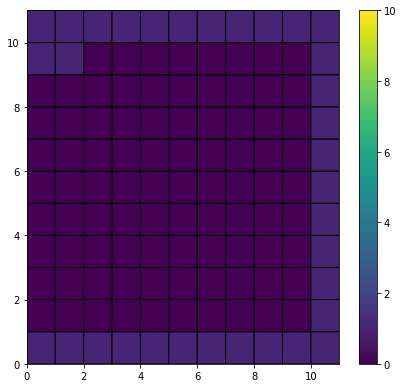

In [10]:
# 26/01/21

# Initialising grids 
grd_x= 11
grd_y= 11

grid= np.zeros([grd_x,grd_y])
ant= np.zeros([grd_x,grd_y],dtype=bool)
ant[0,0]=1


# Initialising variables 
dt=0.001
t_T=100
t=0

phero=1
diff=9/10
pmax=10

# Main loop
while t<t_T:
    t+= 1
    
    # Diffusion loop
    for y in range(grd_y):
        for x in range(grd_x):
            if grid[y,x]>0:
                grid[y,x]*=diff
            else:
                grid[y,x]=0       

    if t%2==0:
        # Loop over whole grid
        for y in range(grd_y):
            for x in range(grd_x):
                # If ant array is true- ant is at that position
                if ant[y,x]==True:

                    # If it is along first colomn of array, it cant move x-1 position
                    if y==0:

                        # If also it is on the first row of array(top right corner), it cant move x-1 or y-1 position
                        if x==0:
                            ant[y,x]= 1
                            grid[y,x]= 1
                            ant[y,x+1]= 1
                            grid[y,x+1] =phero

                        # If also it is on the last row of array(top left corner), it cant move x-1 or y+1 position
                        elif x==grd_x-1:
                            ant[y,x]= 0
                            ant[y+1,x]= 1
                            grid[y+1,x]= phero

                        else:
                            ant[y,x]= 0
                            ant[y,x+1]= 1
                            grid[y,x+1]= phero

                    # If it is along last colomn of array, it cant move x+1 position
                    elif y==grd_y-1:

                        # If also it is on the first row of array(bottom right corner), it cant move x+1 or y-1 position
                        if x==0:
                            ant[y,x]= 0
                            ant[y-1,x]= 1
                            grid[y-1,x]= phero

                         # If also it is on the last row of array(bottom left corner), it cant move x+1 or y+1 position
                        elif x==grd_x-1:
                            ant[y,x]= 0
                            ant[y,x-1]= 1
                            grid[y,x-1]= phero

                        else:
                            ant[y,x]= 0
                            ant[y,x-1]= 1
                            grid[y,x-1]= phero

                    # If it is on the first row of array, it cant move y-1 position
                    elif x==0:
                        ant[y,x]= 0
                        ant[y,x+1]= 1
                        grid[y,x+1]= phero

                    # If it is on the last row of array, it cant move x-1 position
                    elif x== grd_x-1:
                        ant[y,x]= 0
                        ant[y+1,x]= 1
                        grid[y+1,x]= phero

                    # Otherwise has free movement
                    else:
                        ant[y,x]= 0
                        ant[y+1,x]= 1
                        grid[y+1,x]= phero
                else:
                    pass 
      
    # Plots grid
    clear_output(wait=True)
    
    fig, ax= plt.subplots(1, 1, figsize=(7,6.5)) 
    im= ax.pcolor(grid, edgecolors='k', linewidths=1, vmin=0, vmax= pmax*phero)#, cmap=cmap)
    cbar= fig.colorbar(im) 
    
    plt.draw()
    plt.pause(dt) 

### Days: 01/02/21- 07/02/21: Defining functions for chosing ant moves

#### Defining new movemennt function
- Using the cyclical nature of `np.roll`, making an array for x and y, from 0 to 10 to 1 this can be rolled by the value of x+1 or x-1 (where x is the 'x' position in the array) to obtain the forward and back x movement- at the boundarys as I used roll these should will be the same.

In [11]:
# 01/02/21

# Define movement arrays  for x and y
fwd_x= np.arange(0,grd_x,1)
bck_x=np.arange(grd_x-2,0,-1)
move_x=np.append(fwd_x,bck_x)

fwd_y= np.arange(0,grd_y,1)
bck_y=np.arange(grd_y-2,0,-1)
move_y=np.append(fwd_y,bck_y)

# Define function
def moves(x,y):
    '''Finds the movements avaible around x,y, returns array of possible x and y moves'''
    x_fwd= np.roll(move_x,x+1)
    x_bck= np.roll(move_x,x-1)
    
    y_fwd= np.roll(move_y,y+1)
    y_bck= np.roll(move_y,y-1)    

    return [x,x_fwd[0], x_bck[0]],[y, y_fwd[0], y_bck[0]]

print(moves(4,10))

([4, 5, 3], [10, 9, 9])


#### Defining a function for picking move 
- I define a function that takes the array of possible moves from function above, reads pheromone of those cells, and returns a move probablistically based of there pheromone. Probability,$ P$, of a choosing a move, $r_i$ is a function of the pheromone strength, $p$, is given by:

$$P(r_i) = \frac{p(r_i)}{\sum_i^{N_i}p(r_i)}$$

In [12]:
# 01/02/21

def prob_move(m_x,m_y,grid,ant):
    ''' Takes the array of possible x,y moves reads pheromone of those cells from grid array, 
    and returns a move probablistically based of the pheromone'''
    # Initialising arrays
    prob=[]
    pos=[]

    # Loop over arrays to get all x,y combinations
    for x in m_x:
        for y in m_y:
            # Ensure no ant is in the cell to remove cell ant is in
            if ant[y,x]==0:
                # Add possible move pairs to arrays
                pos.append([x,y])
                
                # Adds pheromone level of x,y cell to prob array
                prob.append(grid[x,y]*phero)
    
    # Ensure if none added to pos array it choses randomly
    if len(pos)==0:
        move= [np.random.choice(m_x),np.random.choice(m_y)]   
    
    else:
        
        if sum(prob)==0:
            #print(prob,pos)
            move= pos[np.random.choice(len(pos))]
        else:
            # Normalise probabilities to 1
            p= prob/sum(prob)
            
            # Use prob array to pick from pos array
            move= pos[np.random.choice(len(pos),p=p)]

        return move[0], move[1]

# Testing functions
m_x,m_y= moves(4,10)
print(m_x,m_y)
p=prob_move(m_x,m_y,grid,ant)
print(p)


[4, 5, 3] [10, 9, 9]
(3, 9)


#### Writing loop for implimentation
- Loops over all grid, finds ants and applies functions to find there next move.

In [13]:
# 01/02/21

# Loops over grid
for y in range(grd_y):
    for x in range(grd_x):
        # Find cells with ants
        if ant[y,x]==True:
            # If at nest y=x=0, impliments differently
            if y==0:
                if x==0:
                    # Always ants at nest
                    ant[y,x]= 1
                    grid[y,x]= 1
                    
                    # Update nest each 4 ticks
                    if t%4==0:
                        m_x,m_y= moves(x,y)
                        x1,y1=prob_move(m_x,m_y,grid,ant)
                        ant[y1,x1]= 1
                        grid[y1,x1]= phero
            else:
                # Impliments functions
                m_x,m_y= moves(x,y)
                x1,y1=prob_move(m_x,m_y,grid,ant)
                
                # Sets the new x,y position given to true for the ants, updates pheromone
                ant[y1,x1]= 1
                grid[y1,x1]= phero
                
                # Clears ants current position
                ant[y,x]= 0
        else:
            pass 

#### Implimenting Loop with main code
- Appling loop to see effectiveness, code is altered with food source and pheromone paths : mostly follows path, some glitches with multiple steps, pheromone update is wrong- doesnt add just sets to phero (i.e `grid[y1,x1]= phero` not `grid[y1,x1]+= phero`). Gives error function input doesnt work, it think the possible moves may be zero. 
- Still errors, not fixed for this cell

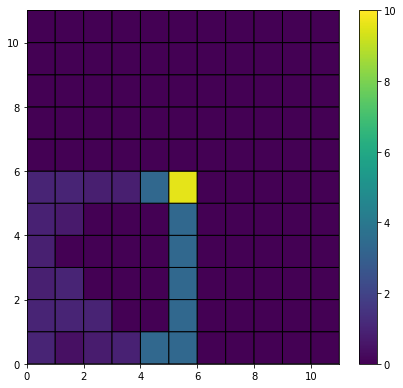

TypeError: cannot unpack non-iterable NoneType object

In [14]:
# 03/02/21

# Set up grid and ants
grd_x= 11
grd_y= 11

grid= np.zeros([grd_x,grd_y])
ant= np.zeros([grd_x,grd_y],dtype=bool)
ant[0,0]=1

# Set an initial pheromone trail
grid[1,0]=grid[2,0]=grid[3,0]=grid[4,0]=grid[5,0]=grid[5,1]=grid[5,2]=grid[5,3]=grid[5,4]=grid[5,5]= 10*phero
grid[0,1]=grid[0,2]=grid[0,3]=grid[0,4]=grid[0,5]=grid[1,5]=grid[2,5]=grid[3,5]=grid[4,5]= 10*phero

# Set up fwd and bck arrays for x/y
fwd_x= np.arange(0,grd_x,1)
bck_x=np.arange(grd_x-2,0,-1)
move_x=np.append(fwd_x,bck_x)

fwd_y= np.arange(0,grd_y,1)
bck_y=np.arange(grd_y-2,0,-1)
move_y=np.append(fwd_y,bck_y)

# Initialise variables
dt=0.001
t_T=100
t=0

phero=1
diff=24/25
pmax=10

while t<t_T:
    t+= 1
    # Keep pheromone at max
    grid[5,5]=pmax
    
    # Diffusion loop
    for y in range(grd_y):
        for x in range(grd_x):
            # if pheromones are greater than zero
            if grid[y,x]>0:
                # Decrease pheromone level
                grid[y,x]*=diff
        

    # Loops over grid
    for y in range(grd_y):
        for x in range(grd_x):
            # Find cells with ants
            if ant[y,x]==True:
                # If at nest y=x=0, impliments differently
                if y==0:
                    if x==0:
                        # Always ants at nest
                        ant[y,x]= 1
                        grid[y,x]= 1

                        # Update nest each 4 ticks
                        if t%4==0:
                            m_x,m_y= moves(x,y)
                            x1,y1=prob_move(m_x,m_y,grid,ant)
                            ant[y1,x1]= 1
                            grid[y1,x1]= phero
                else:
                    # Impliments functions
                    m_x,m_y= moves(x,y)
                    x1,y1=prob_move(m_x,m_y,grid,ant)

                    # Sets the new x,y position given to true for the ants, updates pheromone
                    ant[y1,x1]= 1
                    grid[y1,x1]= phero

                    # Clears ants current position
                    ant[y,x]= 0
            else:
                pass 
                    
    clear_output(wait=True)
    
    fig, ax= plt.subplots(1, 1, figsize=(7,6.5)) 
    im= ax.pcolor(grid, edgecolors='k', linewidths=1, vmin=0, vmax= pmax*phero)#, cmap=cmap)
    cbar= fig.colorbar(im) 
    
    plt.draw()   
    plt.pause(dt)  

### Day: 07/02/21: Working on Loop to get ants find shortest path

#####  Removing condition for nest
- This removes error due to no possible moves and ant surround nest, however now can only have one ant and ants are caught in loops
- Changed pheromone update

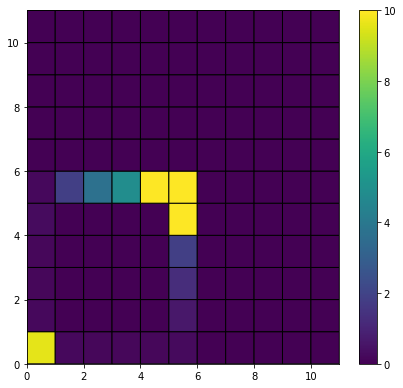

In [15]:
# 07/02/21

# Set up grid and ants
grd_x= 11
grd_y= 11

grid= np.zeros([grd_x,grd_y])
ant= np.zeros([grd_x,grd_y],dtype=bool)
ant[0,0]=1

# Set an initial pheromone trail and variables
phero=1
diff=24/25
pmax=10

grid[1,0]=grid[2,0]=grid[3,0]=grid[4,0]=grid[5,0]=grid[5,1]=grid[5,2]=grid[5,3]=grid[5,4]=grid[5,5]= 10*phero
grid[0,1]=grid[0,2]=grid[0,3]=grid[0,4]=grid[0,5]=grid[1,5]=grid[2,5]=grid[3,5]=grid[4,5]= 10*phero

# Set up fwd and bck arrays for x/y
fwd_x= np.arange(0,grd_x,1)
bck_x=np.arange(grd_x-2,0,-1)
move_x=np.append(fwd_x,bck_x)

fwd_y= np.arange(0,grd_y,1)
bck_y=np.arange(grd_y-2,0,-1)
move_y=np.append(fwd_y,bck_y)

# Initialise variables
dt=0.001
t_T=100
t=0

phero=1
diff=24/25
pmax=10

while t<t_T:
    t+= 1
    # Keep pheromone at max for food and nest
    grid[0,0]=grid[5,5]=pmax
    
    # Diffusion loop
    for y in range(grd_y):
        for x in range(grd_x):
            # if pheromones are greater than zero
            if grid[y,x]>0:
                # Decrease pheromone level
                grid[y,x]*=diff     

    for y in range(grd_y):
        for x in range(grd_x):
            if ant[y,x]==True:
                # Impliments functions
                m_x,m_y= moves(x,y)
                x1,y1=prob_move(m_x,m_y,grid,ant)

                # Sets the new x,y position given to true for the ants, updates pheromone
                ant[y1,x1]= 1
                grid[y1,x1]+= phero

                # Clears ants current position
                ant[y,x]= 0
            else:
                pass 

    # Plots grid 
    clear_output(wait=True)
    
    fig, ax= plt.subplots(1, 1, figsize=(7,6.5)) 
    im= ax.pcolor(grid, edgecolors='k', linewidths=1, vmin=0, vmax= pmax*phero)#, cmap=cmap)
    cbar= fig.colorbar(im) 
    
    plt.draw()   
    plt.pause(dt)  

#### Altering Loop
- Defined nest and food, for easy
- Changed the path to have a smaller one
- Changed diffusion update, the loop was unnessasary, much easier to multiple whole array
- Added new code to add  ants each tick
- Ants loop well, follow path but quickly disperse over grid and initial paths fade, need condition to refine for shortest path

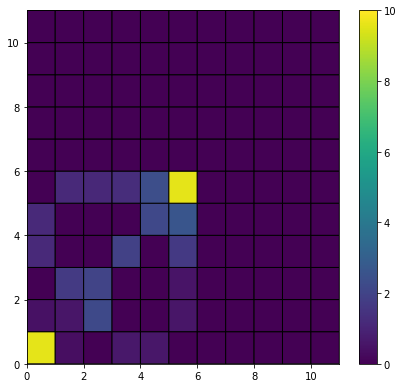

In [16]:
#07/02/21

# Set up grid and ants
grd_x= 11
grd_y= 11

grid= np.zeros([grd_x,grd_y])
ant= np.zeros([grd_x,grd_y])
ant[0,0]=1

# Define nest and food
nest= (0,0)
food= (5,5)

# Set an initial pheromone trail and variables
phero=1
diff=24/25
pmax=10

grid[1,0]=grid[2,0]=grid[3,0]=grid[4,0]=grid[5,0]=grid[5,1]=grid[5,2]=grid[5,3]=grid[5,4]= phero
#grid[0,1]=grid[0,2]=grid[0,3]=grid[0,4]=grid[0,5]=grid[1,5]=grid[2,5]=grid[3,5]=grid[4,5]= phero
grid[1,1]=grid[2,2]=grid[3,3]=grid[4,4]= phero

# Set move arrays 
fwd_x= np.arange(0,grd_x,1)
bck_x=np.arange(grd_x-2,0,-1)
move_x=np.append(fwd_x,bck_x)

fwd_y= np.arange(0,grd_y,1)
bck_y=np.arange(grd_y-2,0,-1)
move_y=np.append(fwd_y,bck_y)

# Initialise variables
dt=0.001
t_T=100
t=0

while t<t_T:
    t+= 1
    
    # Set nest and food to max
    grid[food]=pmax
    grid[nest]= pmax
    
    # Can add ants each tick using code below
    #ant[nest]= 1
    
    # New diffusion update, no loop required
    grid*=diff 
    
    # Every two ticks(slows ant movement)
    if t%2==0:
        for y in range(grd_y):
            for x in range(grd_x):
                if ant[y,x]==True:
                    m_x2,m_y2= moves(x,y)
                    x2,y2=prob_move(m_x2,m_y2,grid,ant)
                    
                    if t%4==0:
                        ant[0:grd_x,0:grd_y]=0

                    ant[y2,x2]= 1
                    grid[y2,x2]+= phero
                    ant[y,x]= -1

                else:
                    pass 
     
    # Plot grid
    clear_output(wait=True)
    fig, ax= plt.subplots(1, 1, figsize=(7,6.5)) 
    im= ax.pcolor(grid, edgecolors='k', linewidths=1, vmin=0, vmax= pmax*phero)#, cmap=cmap)
    cbar= fig.colorbar(im) 
    
    plt.draw()
    plt.pause(dt)  

### Days: 08/02/21- 14/02/21: 

#### Possible more compact move array set up

In [17]:
# 08/02/21

grd_x= 11
grd_y= 11

move_x = np.zeros(2*grd_x-2, dtype= 'int')
for i in range(1,grd_x):
    move_x[i]= move_x[2*grd_x-2-i]= i
    
move_y = np.zeros(2*grd_y-2, dtype= 'int')
for i in range(1,grd_y):
    move_y[i]= move_y[2*grd_y-2-i]= i
    

#### Altering move selection functions
-  Removing duplicates and removing back moves in selection
- Was coding wrong, need to keep ants to path, only allow move to cells with a pheromone level- so only the paths i initialise

In [18]:
# 11/02/21

# Initialises variables
grd_x= 11
grd_y= 11
grid= np.zeros([grd_y,grd_x])
ant= np.zeros([grd_y,grd_x],dtype=bool)

move_x = np.zeros(2*grd_x-2, dtype= 'int')
for i in range(1,grd_x):
    move_x[i]= move_x[2*grd_x-2-i]= i
    
move_y = np.zeros(2*grd_y-2, dtype= 'int')
for i in range(1,grd_y):
    move_y[i]= move_y[2*grd_y-2-i]= i
    

def moves(x,y):
    '''Finds the movements avaible around x,y, returns array of possible x and y moves'''
    x_fwd= np.roll(move_x,x+1)
    x_bck= np.roll(move_x,x-1)
    
    y_fwd= np.roll(move_y,y+1)
    y_bck= np.roll(move_y,y-1)    

    # change code to remoove repeats as is can effect probablities
    x1= [x,x_fwd[0], x_bck[0]]
    y1= [y, y_fwd[0], y_bck[0]]
    return list(set(x1)), list(set(y1))

def prob_move(x0, y0, r1, r2, m_x, m_y, grid):
    ''' Takes the array of possible x,y moves reads pheromone of those cells from grid array, 
    and returns a move probablistically based of the pheromone, disallowing moves to r1 or r2'''
    prob=[]
    pos=[]
    for x in m_x:
        for y in m_y:
            # Disallow r1 and r2, as they are last two moves, only allow moves with cells with pheromone
            if grid[y,x]>0 and [x,y] != [x0,y0] and [x,y] != r1 and [x,y] != r2:
                pos.append([x,y])
                prob.append(grid[y,x])
    p= prob/sum(prob)
    #print(p)
    move= pos[np.random.choice(len(pos),p=p)]

    return move[0], move[1]

# Testing function
grid= np.zeros([grd_x,grd_y])

phero=1
grid[1,0]=grid[2,0]=grid[3,0]=grid[4,0]=grid[5,0]=grid[5,1]=grid[5,2]=grid[5,3]=grid[5,4]= phero
grid[1,1]=grid[2,2]=grid[3,3]=grid[4,4]= phero

m_x,m_y= moves(0,0)
nest= [0,0]
px,py= prob_move(0, 0, nest, nest, m_x, m_y, grid)

print(m_x,m_y)
print(px,py)

[0, 1] [0, 1]
1 1


#### Implimenting new function
- Some what successful, ant only goes in cells along the path, however, ants get trapped in loops and cant impliment for more than one ant. At corners in path causes problems annd disallowing steps could lead to traping ant. Also not always taking one step and ant ends up picking long path. Dont travel some squares like theres a "barrier"

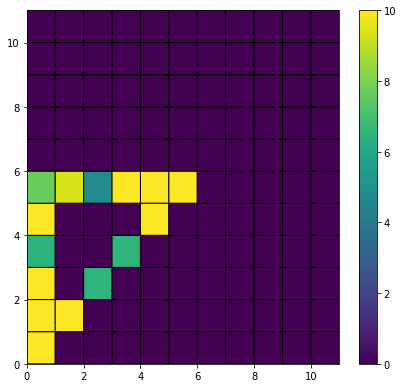

In [19]:
# 11/02/21
grd_x= 11
grd_y= 11

phero=1
diff=24.9/25
pmax=10

grid= np.zeros([grd_x,grd_y])
ant= np.zeros([grd_x,grd_y])
ant[0,0]= 1

nest= [0,0]
food= [5,5]
x1= y1 = x3= y3 = 0

grid[1,0]=grid[2,0]=grid[3,0]=grid[4,0]=grid[5,0]=grid[5,1]=grid[5,2]=grid[5,3]=grid[5,4]= phero
#grid[0,1]=grid[0,2]=grid[0,3]=grid[0,4]=grid[0,5]=grid[1,5]=grid[2,5]=grid[3,5]=grid[4,5]= phero
grid[1,1]=grid[2,2]=grid[3,3]=grid[4,4]= phero

dt=0.001
t_T=100
t=0


while t<t_T:
    t+= 1
    
    grid*=diff       

    grid[food[0],food[1]]=pmax
    # ant[0,0]= 1
    grid[nest[0],nest[1]]= pmax

    if t%1==0:
        for y in range(grd_y):
            for x in range(grd_x):
                if ant[y,x]==True:
                    x3= np.copy(x1)
                    y3= np.copy(y1)
                    
                    m_x2,m_y2= moves(x,y)
                    x2,y2= prob_move(x, y, [x1, y1], [x3, y3], m_x2, m_y2, grid)
                    
                    if [x2,y2] != nest or [x2,y2] != food :                       
                        x1= np.copy(x)
                        y1= np.copy(y)
                        
                    ant[y2,x2]= 1
                    grid[y2,x2]+= phero
                    ant[y,x]= 0
                    
                    print(x,y)

                else:
                    pass 
                    
    clear_output(wait=True)
    
    fig, ax= plt.subplots(1, 1, figsize=(7,6.5)) 
    im= ax.pcolor(grid, edgecolors='k', linewidths=1, vmin=0, vmax= pmax*phero)#, cmap=cmap)
    cbar= fig.colorbar(im) 
    
    plt.draw()
    plt.pause(dt)  

#### See if changing from diagonal path helps
- Ant just loops round speaking with instructor and group it seems hard coded set paths and dictonarys will be more advantagous

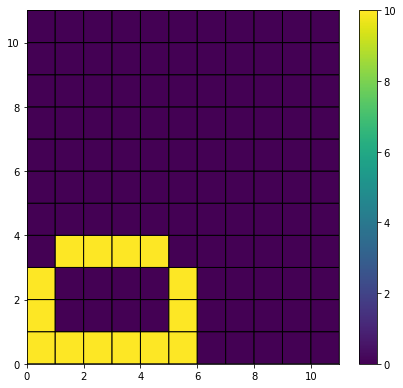

In [20]:
# 14/02/21
grd_x= 11
grd_y= 11

phero=1
diff=24.9/25
pmax=10

grid= np.zeros([grd_y,grd_x])
ant= np.zeros([grd_y,grd_x])
ant[0,0]= 1

nest= [0,0]
food= [0,5]
x1= y1 = x3= y3 = 0

#grid[1,0]=grid[2,0]=grid[3,0]=grid[4,0]=grid[5,0]=grid[5,1]=grid[5,2]=grid[5,3]=grid[5,4]= phero
#grid[0,1]=grid[0,2]=grid[0,3]=grid[0,4]=grid[0,5]=grid[1,5]=grid[2,5]=grid[3,5]=grid[4,5]= phero
#grid[1,1]=grid[2,2]=grid[3,3]=grid[4,4]= phero

grid[0,1]=grid[0,2]=grid[0,3]=grid[0,4]=grid[0,5]= phero
grid[1,0]=grid[2,0]=grid[3,1]=grid[3,2]=grid[3,3]=grid[3,4]=grid[2,5]=grid[1,5]= phero

dt=0.001
t_T=100
t=0


while t<t_T:
    t+= 1
    
    grid*=diff       

    grid[food[0],food[1]]=pmax*100
    # ant[0,0]= 1
    grid[nest[0],nest[1]]= pmax*100

    if t%1==0:
        for y in range(grd_y):
            for x in range(grd_x):
                if ant[y,x]==True:
                    m_x2,m_y2= moves(x,y)
                    x2,y2= prob_move(x, y, [x1, y1], [x3, y3], m_x2, m_y2, grid)
                    
                    if [x2,y2] == nest or [x2,y2] == food :                       
                        x3= 0
                        y3= 0
                        
                        x1= 0
                        y1= 0
                    
                    else:
                        x3= np.copy(x1)
                        y3= np.copy(y1)
                        
                        x1= np.copy(x)
                        y1= np.copy(y)
                        
                    ant[y2,x2]= 1
                    grid[y2,x2]+= phero
                    ant[y,x]= 0
                    
                    print(x,y)

                else:
                    pass 
                    
    clear_output(wait=True)
    
    fig, ax= plt.subplots(1, 1, figsize=(7,6.5)) 
    im= ax.pcolor(grid, edgecolors='k', linewidths=1, vmin=0, vmax= pmax*phero)#, cmap=cmap)
    cbar= fig.colorbar(im) 
    
    plt.draw()
    plt.pause(dt) 

### Days: 15/02/21 - 21/02/21: Changing approach using dictonaries

####  Testing setting up and indexing path and site dictonary
- Project supervisor had suggested use of dictonaries
- Plan to set hard coded paths the ant follows, and decision on path is just made at food and nest / nodes
- And have a site dictonary to hold its position and paths out of it

In [21]:
# 18/02/21
grd_x= 11
grd_y= 11

phero=1
diff=24.9/25
pmax=10

grid= np.zeros([grd_y,grd_x])

paths= {'short': ((1,1), (2,2), (3,3), (4,4)),
        'long' : ( (1,0), (2,0), (3,0), (4,0), (5,0), (5,1), (5,2), (5,3), (5,4) ) }

for values in paths.values():
    for i in values:
        print( grid[i] )

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [22]:
# 18/02/21
s = {'nest': (0,0),  
     'food': (5,5)}

for v in s.values():
    print(v)

(0, 0)
(5, 5)


##### Setting up site dictonary
- Creating nested dictonary of sites, contain sites (nest/food), whic is set to a dictonary holdin teh position and paths out of the site

In [3]:
# 18/02/21

short= ((1,1), (2,2), (3,3), (4,4))
long= ( (1,0), (2,0), (3,0), (4,0), (5,0), (5,1), (5,2), (5,3), (5,4) )

s1    = {'nest': {
         'pos' : (0,0),
          0    : short,
          1    : long },  

         'food': {
         'pos' : (0,0),
          0    : short[::-1],
          1    : long[::-1] } }

# Testing some loops to index for sites positions and site paths
for v in s1.values():
    # Gives the position of the sites
    print( list (s1.keys()), v['pos'])
    
    # Returns first position of each path array 
    for i in range(len(v.keys())-1):
        print(v[i][0])
    
    # Returns the path name and each position in the paths for the sites
    for paths in range(len(v.keys())-1):
        for i in v[paths]:
            print(paths, i)

['nest', 'food'] (0, 0)
(1, 1)
(1, 0)
0 (1, 1)
0 (2, 2)
0 (3, 3)
0 (4, 4)
1 (1, 0)
1 (2, 0)
1 (3, 0)
1 (4, 0)
1 (5, 0)
1 (5, 1)
1 (5, 2)
1 (5, 3)
1 (5, 4)
['nest', 'food'] (0, 0)
(4, 4)
(5, 4)
0 (4, 4)
0 (3, 3)
0 (2, 2)
0 (1, 1)
1 (5, 4)
1 (5, 3)
1 (5, 2)
1 (5, 1)
1 (5, 0)
1 (4, 0)
1 (3, 0)
1 (2, 0)
1 (1, 0)


#### Creating a function to set up a colony of ants
- Sets up dictonary of N ants at node 'pos' in sites dictionary: This will be a nested dictonary of ants 0-N, they will each have a dictonary containing there number, positon and path they'll follow. This can then be used to update the ants position based on path dictonary array.

In [4]:
# 19/02/21

def init_colony(N, pos, sites):
    '''Sets up dictonary of N ants at node 'pos' in sites dictionary: This will be a nested dictonary of ants 0-N,
    they will each have a dictonary containing there number, positon and path they'll follow
    ''' 
    
    #Initalise dictonary
    colony= {} 
    
    # Loop adding N ants to the dictonary
    for n in range(N):
        colony[n] = { 
            'ant'   : n ,
            'pos'   : sites.get(pos)['pos'],
            'path'  : ()} 
    return colony

# Testing and indexing dictonary from function
col_test= init_colony(3, 'nest', s1)

# 
for i,ant in col_test.items():
    # print(i, ant)
    
    ant['path']= short
    ant['pos']= short[i]
    
    print(ant['path'].index(ant['pos']))
    
print(col_test)

# Some test indexing
col_test[0]['path']= short
col_test[0]['pos']= short[1]

indx= col_test[0]['path'].index(col_test[0]['pos'])

# print(indx)

0
1
2
{0: {'ant': 0, 'pos': (1, 1), 'path': ((1, 1), (2, 2), (3, 3), (4, 4))}, 1: {'ant': 1, 'pos': (2, 2), 'path': ((1, 1), (2, 2), (3, 3), (4, 4))}, 2: {'ant': 2, 'pos': (3, 3), 'path': ((1, 1), (2, 2), (3, 3), (4, 4))}}


#### Creating a function  colony of ants
- Sets up function to add N ants at node 'pos' in sites dictionary: This will be a nested dictonary of ants 0-N, they will each have a dictonary containing there number, positon and path they'll follow. This can then be used to update the ants position based on path dictonary array.

In [5]:
def add_colony(colony, N, pos, sites):
    '''Adds N ants at node 'pos' in sites dictionary, to the colony dictonary: 
    This will be a nested dictonary of ants 0-N, they will each have a dictonary containing there number, 
    positon and path they'll follow''' 
    
    # Loop adding N ants to the dictonary, finds size of existing colony array and adds N
    for n in range(len(colony), len(colony) + N):
        colony[n] = { 
            'ant'   : n ,
            'pos'   : sites.get(pos)['pos'],
            'path'  : ()} 
    
    return colony

print( add_colony({}, 3, 'nest', s1))

{0: {'ant': 0, 'pos': (0, 0), 'path': ()}, 1: {'ant': 1, 'pos': (0, 0), 'path': ()}, 2: {'ant': 2, 'pos': (0, 0), 'path': ()}}


#### New path choosing function
- New function only used to pick set path when at site/node, i.e. nest and food, pick based on pheromone of first cell of path. when note at node ant will just follow the path set

In [6]:
# 19/02

def path_choice(site, grid):
    ''' Chose path for ant to move along based on pheromone,
    Input:
    site-   Site dictionary containing pos and paths out
    grid-   The grid array cointaining pheromone '''
    
    # Initialising the options and probability arrays
    opt= []
    prob= []

    # Loops for the paths in the site dictionary given: 
    # As they are numbered paths go from 0 to size of site dictionary minus one( as only contains paths and pos)
    for path in range(len(site)-1):               
        # Appends the the path to opt and pheromone level in the first step of path to prob
        opt.append(path)
        prob.append( (grid[site[path][1]]))
     
    # Normalises the pheromones to one to give a probability
    p= (prob)/sum(prob)
    #print(p)
    
    move= opt[np.random.choice(len(opt),p=p)]

    return move

#print(path_choice(sites['nest'], grid, 1))

#### Implimenting Dictionaries into loop
- Highly sucessfull, mostly working only some problems as can pick long path sometimes as random picks long path at at begining and reinforces it, and short networks can be raise pheromone equally for both paths

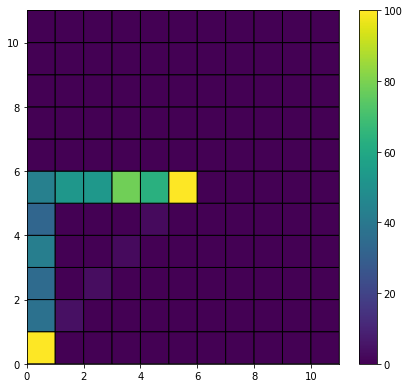

100


In [27]:
# 18/02

# Initialising grid
grd_x= 11
grd_y= 11
grid = np.zeros([grd_y,grd_x])

# Initialising pheromone variables
phero   = 1
pmax    = 100
pdiff   = 0.55 

# Initialising time variables
dt  = 0.001
t_T = 100
t   = 0

# Initialising path- use tuples as easier to use to index, in form (y,x)
short = ( (0,0), (1,1), (2,2), (3,3), (4,4), (5,5) )
long  = ( (0,0), (1,0), (2,0), (3,0), (4,0), (5,0), (5,1), (5,2), (5,3), (5,4), (5,5) )
#short = ( (0,0), (1,1), (2,2), (3,3), (4,4), (5,5), (6,6), (7,7), (8,8), (9,9), (10,10))
#long  = ( (0,0), (1,0), (2,0), (3,0), (4,0), (5,0), (6,0), (7,0), (8,0), (9,0), (10,0), 
         #(10,1), (10,2), (10,3), (10,4), (10,5), (10,6), (10,7), (10,8), (10,9), (10,10) )

# Initialising sites array with positions and arrays of paths away
sites = {'nest': {
         'pos' : short[0],
          0    : short,
          1    : long },  

         'food': {
         'pos' : short[::-1][0],
          0    : short[::-1],
          1    : long[::-1] } }

# Setting pheromone on grid for paths in sites, and set site positions to max pheromone
for values in sites.values():
    for paths in range(len(values.keys())-1):
        for i in values[paths]:
            grid[i]= phero
        
    grid[values['pos']]= pmax    

# Setting up ant colony for Nants ants 
Nants  = 100
colony = init_colony( Nants, 'nest', sites)

while t < t_T:
    # Counts time
    t += 1
    print(t)
    
    # Adds ant each tick
    colony = add_colony(colony, 1, 'nest', sites)
    
    # Reduces pheromone level by diffusion rate
    grid *= pdiff       
    
    # Ensures site positions are pheromone max
    grid[sites['nest']['pos']]= pmax
    grid[sites['food']['pos']]= pmax

    # Loops for all ants
    for n,ant in colony.items():
        # For all sites 
        for site in sites.values():
            # If ant is at the site
            if ant['pos'] == site['pos']:  
                # Uses function to get next path
                nxt_path = path_choice(site, grid)
                
                # Set ants new path and position
                ant['path'] = site[nxt_path]
                ant['pos']  = site[nxt_path][1]
                
                # Increase pheromone for cell  ant is in now, limit to make pheromone
                if grid[ ant['pos']]< pmax:
                    grid[ ant['pos']]+= phero   
        
        # Otherwise, if not at site position updates to next position in ants path
        # Finds index in the path, the ant is at and adds one
        indx= ant['path'].index(ant['pos'])
        nxt_indx= indx + 1
        
        # Update ant position to the next index position 
        ant['pos'] = ant['path'][nxt_indx]
        
        # Updates pheromone, limit to max level
        if grid[ ant['pos']]< pmax:
            grid[ ant['pos']]+= phero 
       
    # Plots grid 
    clear_output(wait=True)
    
    fig, ax= plt.subplots(1, 1, figsize=(7,6.5)) 
    im= ax.pcolor(grid, edgecolors='k', linewidths=1, vmin=0, vmax= pmax)
    cbar= fig.colorbar(im) 
    
    plt.draw()
    plt.pause(dt)
    
    # Can monitor ant positions
    #for i in range(len(colony)):
        #print(colony[i]['pos'])
    
print(t)  

#### Altering path choosing function
- New function raise pheromone level to factor alpha, this can be used to alter the distribution- making it closer to 50/50 at begin. Probability,$ P$, of a choosing a path, $ij$, is a function of the pheromone strength,$\tau$, of first cell in the path is given by:

$$P_{ij} = \frac{\tau_{ij}^\alpha}{\sum_k^{N_i}\tau_{ik}^\alpha}$$

In [781]:
# 19/02/21

def path_choice(site, grid, alpha):
    ''' Chose path for ant to move along based on pheromone,
    Input:
    site-   Site dictionary containing pos and paths out
    grid-   The grid array cointaining pheromone
    alpha-  Factor which skew distribution  '''
    
    # Initialising the options and probability arrays
    opt= []
    prob= []

    # Loops for the paths in the site dictionary given: 
    # As they are numbered paths go from 0 to size of site dictionary minus one( as only contains paths and pos)
    for path in range(len(site)-1):               
        # Appends the the path to opt and pheromone level in the first step of path to prob
        opt.append(path)
        prob.append( (grid[site[path][1]])**alpha )
     
    # Normalises the pheromones to one to give a probability
    p= (prob)/sum(prob)
    #print(p)
    
    # Picks move probablisitcally
    move= opt[np.random.choice(len(opt),p=p)]

    return move

#print(path_choice(sites['nest'], grid, 1))

#### Refining Loop
- Implimenting the new probability function, I set alpha to change over time, this skews the distribution, I set alpha to be the time divided by some "depression factor", so named as when t<depression factor, alpha will be a fraction, this skews the distribution to 50/50, so for that time the effect of pheromone will be depressed so ants pick fairly  evenly. Then after t = depression factor the probability distribution will skew to higher pheromone for even small differences. As the short path takes less time, during the 50/50 period this will reinforce the small path and after the long will fade


- The depression factor from trial works best when set to the length of longest path, this can be investigated further



- Can work with a set alpha variable, but this and other variables need tweeking when changing path sizes, will look to find optimal values after coding TSP. May be able to remove the depression variable with a optimal alpha, possible linked to path size

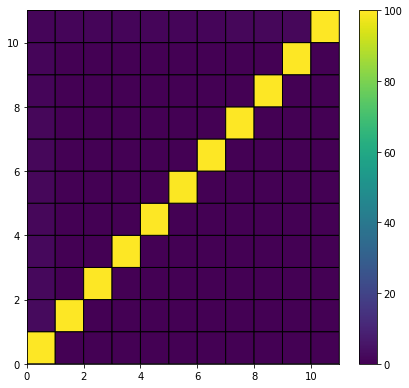

In [8]:
# 19/02/21

# Initialising grid
grd_x= 11
grd_y= 11
grid = np.zeros([grd_y,grd_x])

# Initialising path- use tuples as easier to use to index, in form (y,x)

#short = ( (0,0), (1,1), (2,2), (3,3), (4,4), (5,5) )
#long  = ( (0,0), (1,0), (2,0), (3,0), (4,0), (5,0), (5,1), (5,2), (5,3), (5,4), (5,5) )

short = ( (0,0), (1,1), (2,2), (3,3), (4,4), (5,5), (6,6), (7,7), (8,8), (9,9), (10,10))
long  = ( (0,0), (1,0), (2,0), (3,0), (4,0), (5,0), (6,0), (7,0), (8,0), (9,0), (10,0), (10,1), (10,2), (10,3), (10,4), (10,5), (10,6), (10,7), (10,8), (10,9), (10,10) )

#short = ((0,0), (0,1), (0,2), (0,3), (0,4), (0,5))
#long  = ((0,0), (1,0), (2,0), (3,0), (3,1), (3,2), (3,3), (3,4), (3,5), (2,5), (1,5), (0,5))

# Initialising pheromone variables
phero   = 1
pmax    = 100
pdiff   = 0.9 
pdeprss = len(long)
# Depression factor based on longest path, used to set alpha for path picking

# Can also use a set alpha value instead
alpha = 1.0

# Initialising time variables
dt  = 0.001
t_T = 100
t   = 0

# Initialising sites array with positions and arrays of paths away
sites = {'nest': {
         'pos' : short[0],
          0    : short,
          1    : long },  

         'food': {
         'pos' : short[::-1][0],
          0    : short[::-1],
          1    : long[::-1] } }

# Setting pheromone on grid for paths in sites, and set site positions to max pheromone
for values in sites.values():
    for paths in range(len(values.keys())-1):
        for i in values[paths]:
            grid[i]= phero
        
    grid[values['pos']]= pmax    

# Setting up ant colony for Nants ants 
Nants  = 100
colony = add_colony({}, Nants, 'nest', sites)


while t < t_T:
    # Counts time
    t += 1
    print(t)
    
    # Adds ant each tick
    colony = add_colony(colony, 1, 'nest', sites)
    
    # Reduces pheromone level by diffusion rate
    grid *= pdiff       
    
    # Ensures site positions are pheromone max
    grid[sites['nest']['pos']]= pmax
    grid[sites['food']['pos']]= pmax

    # Loops for all ants
    for n,ant in colony.items():
        # For all sites 
        for site in sites.values():
            # If ant is at the site
            if ant['pos'] == site['pos']:                  
                # Picks next path
                nxt_path = path_choice(site, grid, t/pdeprss)
                
                # Set ants new path and position
                ant['path'] = site[nxt_path]
                ant['pos']  = site[nxt_path][1]
                
                # Increase pheromone for cell  ant is in now, limit to make pheromone
                if grid[ ant['pos']]< pmax:
                    grid[ ant['pos']]+= phero   
        
        # Otherwise, if not at site position updates to next position in ants path
        # Finds index in the path, the ant is at and adds one
        indx= ant['path'].index(ant['pos'])
        nxt_indx= indx + 1
        
        # Update ant position to the next index position 
        ant['pos'] = ant['path'][nxt_indx]
        
        # Updates pheromone, limit to max level
        if grid[ ant['pos']]< pmax:
            grid[ ant['pos']]+= phero 
       
    # Plots grid 
    clear_output(wait=True)
    
    fig, ax= plt.subplots(1, 1, figsize=(7,6.5)) 
    im= ax.pcolor(grid, edgecolors='k', linewidths=1, vmin=0, vmax= pmax)
    cbar= fig.colorbar(im) 
    
    plt.draw()
    plt.pause(dt)
    #for i in range(len(colony)):
        #print(colony[i]['pos'])   

#### Defining function to return path from point to point
- To save time can use equation for straight line to make paths along grid, points have to be chosen carefully if a diagonal path.

In [7]:
# 21/02/21

def ptp(r0, rf):
    '''Returns path from point to point
    Input:
    r0  Tuple of start of path , form (y,x)
    rf  Tuple of end of path , form (y,x)'''
    
    # Extractin x and y positions
    y0, x0 = r0
    yf, xf = rf
    
    # If x difference is greater than y change, use x difference number points in path
    if abs(yf-y0) <= abs(xf-x0):
        d = abs(xf-x0)+1
    
    # If y change is greater than x change, use that number points in path
    else:
        d = abs(yf-y0)+1
    
    # Create arrays of the x and y values for the tuples along path
    # As we ensure the biggest difference is used we ensure we dont miss any grid points
    # We ensure the arrays are integers, if one difference is much smaller than other we get duplicates of values
    # Given steeper or shallow gradient, but point always connected, if difference of one is zero, gives array of 0
    y = np.linspace(y0, yf, d, dtype= int)
    x = np.linspace(x0, xf, d, dtype= int)
    
    line=[]
    # Joins the x and y array to get list of cells in path
    for i in range(d):
        line.append((y[i],x[i]))
    
    return tuple(line)

print( ptp((0,0),(0,10)) )

print( ptp((6,1),(11,5)) )

print( ptp((6,2),(11,5)) )

print( ptp((11,5),(6,2)) )

print( ptp((11,0),(6,10)) )

((0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10))
((6, 1), (7, 1), (8, 2), (9, 3), (10, 4), (11, 5))
((6, 2), (7, 2), (8, 3), (9, 3), (10, 4), (11, 5))
((11, 5), (10, 4), (9, 3), (8, 3), (7, 2), (6, 2))
((11, 0), (10, 1), (10, 2), (9, 3), (9, 4), (8, 5), (8, 6), (7, 7), (7, 8), (6, 9), (6, 10))


#### Code to find path found:
- Will test the two paths if one paths pheromone density is above a certain percentage tolerance of the pheromone over both paths, and if the average pheromone is over half the max pheromone on the grid.

In [ ]:
# 20/02/21

# Initialise variables
solved = False
solution = 'null'
tol = 0.85

# Sums pheromone of grid along the path
density_s = sum( map(lambda x: grid[x], sites['nest'][0][1:-1]) ) / len( sites['nest'][0][1:-1] )
density_l = sum( map(lambda x: grid[x], sites['nest'][1][1:-1]) ) / len( sites['nest'][1][1:-1] )

density_T = (density_s+density_l)

# If the density of  short path  is above percentage tolerance of the pheromone over both paths, 
# If the average pheromone is over half the max pheromone on the grid stops loop
if density_l/density_T > tol:if density_s/density_T > tol and density_s >pmax*0.5     solved   = True:
    solved   = True
    solution = 'short'
    
# Same for long path
if density_l/density_T > tol:if density_s/density_T > tol and density_s >pmax*0.5     solved   = True:
    solved   = True
    solution = 'long'

print('Optimam path' ,solution, '. Found in',t,'s')

#### Implimenting the code to stop if path is found
- The code can now test quantitatively if the correct ( short ) path is found, this can then layer be used to optimise the variables

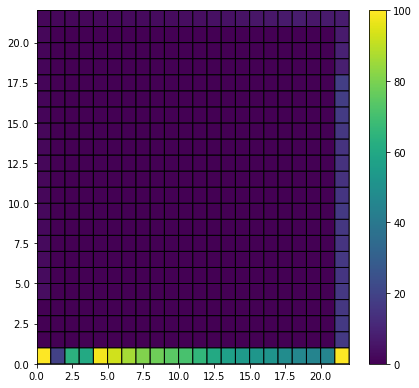

62.602322391167604 0.9024896292707989
Optimam path short . Found in 78 s


In [353]:
# 20/02/21

# Initialising grid
grd_x= 22
grd_y= 22
grid = np.zeros([grd_y,grd_x])

# Initialising path- use tuples as easier to use to index, in form (y,x)
short = ptp((0,0),(21,21))
long  = ptp((0,0),(21,0))+ptp((21,0),(21,21))[1:]

short = ptp((0,0),(0,21))
long  = ptp((0,0),(21,0))+ptp((21,0),(21,21))[1:-1]+ptp((21,21),(0,21))[:]

# Initialising pheromone variables
phero   = 1
pmax    = 100
pdiff   = 0.9 
pdeprss = 40
# Depression factor based on longest path, used to set alpha for path picking

# Can also use a set alpha value instead
alpha = 1.0

# Initialising time variables
dt  = 0.001
t_T = 150
t   = 0

# Initialise tolerence variables
solved = False
solution = 'null'
tol = 0.9

# Initialising sites array with positions and arrays of paths away
sites = {'nest': {
         'pos' : short[0],
          0    : short,
          1    : long },  

         'food': {
         'pos' : short[::-1][0],
          0    : short[::-1],
          1    : long[::-1] } }

# Setting pheromone on grid for paths in sites, and set site positions to max pheromone
for values in sites.values():
    for paths in range(len(values.keys())-1):
        for i in values[paths]:
            grid[i]= phero
        
    grid[values['pos']]= pmax    

# Setting up ant colony for Nants ants 
Nants  = 100
colony = add_colony({}, Nants, 'nest', sites)


while t < t_T and solved == False:
    # Counts time
    t += 1
    print(t)
    
    # Adds ant each tick
    colony = add_colony(colony, 1, 'nest', sites)
    
    # Reduces pheromone level by diffusion rate
    grid *= pdiff       
    
    # Ensures site positions are pheromone max
    grid[sites['nest']['pos']]= pmax
    grid[sites['food']['pos']]= pmax

    # Loops for all ants
    for n,ant in colony.items():
        # For all sites 
        for site in sites.values():
            # If ant is at the site
            if ant['pos'] == site['pos']:                  
                # Picks next path
                nxt_path = path_choice(site, grid, t/pdeprss)
                
                # Set ants new path and position
                ant['path'] = site[nxt_path]
                ant['pos']  = site[nxt_path][1]
                
                # Increase pheromone for cell  ant is in now, limit to make pheromone
                if grid[ ant['pos']]< pmax:
                    grid[ ant['pos']]+= phero   
        
        # Otherwise, if not at site position updates to next position in ants path
        # Finds index in the path, the ant is at and adds one
        indx= ant['path'].index(ant['pos'])
        nxt_indx= indx + 1
        
        # Update ant position to the next index position 
        ant['pos'] = ant['path'][nxt_indx]
        
        # Updates pheromone, limit to max level
        if grid[ ant['pos']]< pmax:
            grid[ ant['pos']]+= phero 
       
    # Plots grid 
    clear_output(wait=True)
    
    fig, ax= plt.subplots(1, 1, figsize=(7,6.5)) 
    im= ax.pcolor(grid, edgecolors='k', linewidths=1, vmin=0, vmax= pmax)
    cbar= fig.colorbar(im) 
    
    plt.draw()
    plt.pause(dt)
    
    # Sums pheromone of grid along the path
    density_s = sum( map(lambda x: grid[x], sites['nest'][0][1:-1]) ) / len( sites['nest'][0][1:-1] )
    density_l = sum( map(lambda x: grid[x], sites['nest'][1][1:-1]) ) / len( sites['nest'][1][1:-1] )
    
    density_T = (density_s+density_l)
    
    print(density_s, density_s/density_T )

    # If the density of  short path  is above percentage tolerance of the pheromone over both paths, 
    # If the average pheromone is over half the max pheromone on the grid stops loop
    if density_s/density_T > tol and density_s > pmax*0.5:
        solved   = True
        solution = 'short'

    # Same for long path
    if density_l/density_T > tol and density_l > pmax*0.5:   
        solved   = True
        solution = 'long'

print('Optimam path', solution,'. Found in',t,'s')

## Further Code: Traveling Salesman Problem:

### Days: 21/02/21 - 28/02/21: Traveling Salesman Problem Initialising

#### Testing point to point function on making a sites dictionary
- Using function to make paths then using them in sites array

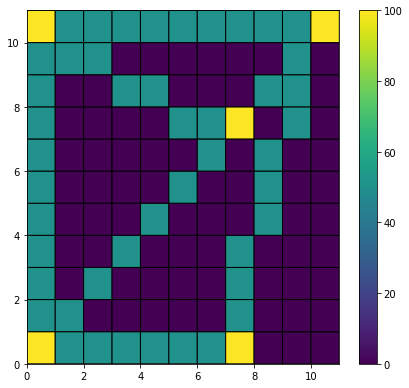

In [37]:
# 21/02/21

# Grid variables
grd_x= 11
grd_y= 11
grid = np.zeros([grd_y,grd_x])

phero   = 50
pmax    = 100

# Define node positions 
nd0 = (0,0)
nd1 = (10,0)
nd2 = (0,7)
nd3 = (7,7)
nd4 = (10,10)

# Define edges/ paths between node/sites
node0_1 = ptp(nd0, nd1)
node0_2 = ptp(nd0, nd2)
node0_3 = ptp(nd0, nd3)

node1_4 = ptp(nd1, nd4)
node1_3 = ptp(nd1, nd3)

node2_4 = ptp(nd2, nd4)

node3_4 = ptp(nd3, nd4)

#print(node0_1,'\n',node0_2,'\n',node0_3,'\n',node1_4,'\n 1-3',node1_3,'\n',node2_4,'\n',node3_4,'\n')

# Set up sites array
sites = {'nod0': {
         'pos' : nd0,
          0    : node0_1,
          1    : node0_2,
          2    : node0_3 },  

         'nod1': {
         'pos' : nd1,
          0    : node0_1[::-1],
          1    : node1_3,
          2    : node1_4}, 
        
         'nod2': {
         'pos' : nd2,
          0    : node0_2[::-1],
          1    : node2_4 },
        
         'nod3': {
         'pos' : nd3,
          0    : node0_3[::-1],
          1    : node1_3[::-1],
          2    : node3_4 },
                 
         'nod4': {
         'pos' : nd4,
          0    : node1_4[::-1],
          1    : node2_4[::-1],
          2    : node3_4[::-1]} } 

# Setting path pheromons
for values in sites.values():
    for paths in range(len(values.keys())-1):
        for i in values[paths]:
            grid[i]= phero
            #print(i)

# Set site pheromone tp max
for values in sites.values():        
    grid[values['pos'] ]= pmax    
    
#grid[sites['node0']['pos']]= pmax   

# Plot to check
fig, ax= plt.subplots(1, 1, figsize=(7,6.5)) 
im= ax.pcolor(grid, edgecolors='k', linewidths=1, vmin=0, vmax= pmax)
cbar= fig.colorbar(im) 

plt.draw()

#### Experimenting with sting implimentation
- Plan to use function to 'read' a string and create the graph of sites/nodess more easily, can try remove the letters an get number of nodes, also can use it in dictionaries to make them easier to read if printed

In [38]:
# 22/02/21

a = 'ant'+str(1)
print(a)

b = 2 + int('1')
print(b)

eval('b')

print('node0_1'[4:].replace('_', ''))

if 'nest' in sites:
    print(0)

ant1
3
01


In [381]:
links =('node1_2','node1_12')
for l in links:
        nd1 = l[4:].replace('_', ' ')
        nd = nd1.split()
        
        print(l, nd, nd1, 'node'+nd[1])   

node1_2 ['1', '2'] 1 2 node2
node1_12 ['1', '12'] 1 12 node12


#### Function to set up dictionaries of sites for the graph containing nodes and edges
- Setting up a function which takes a list of nodes(locations) and a string list of edges(links) between them, and sets up a dictonary of nodes and edges, this will be used to set up site dictonary of the network as sets up the links with minimal input
- The site dictonary will contain path locations and paths out of the node.

In [8]:
# 22/02/21
def graph(loc, links):
    '''Takes list of nodes(locations) and a string list of edges(links) between them, and sets up a dictonary of nodes
    with their positions and edges specify paths. 
    
    Inputs:
    loc     Ordered array of node location as tuples, ie node0 in 0th position in form (y,x)
    links   String list of connections between nodes in form, node0_1, where 0 would be the start node and 
            1 would be the end node. Condition for string must be in form node0_1
            
    Outputs:
    graph   Dictionary containing all nodes and their positions, and the edges out'''
    
    graph = {} 
    for i in range(len(loc)):
        # Adds to dictonary item as string of form node0 where 0 is the node no
        # The value of each item is another dictonary with first item is their pos
        graph['node'+str(i)] = {'pos' : loc[i]}

    for l in links:
        # Links should be in form node0_1(as long as it ends in 0_1), so take  last 3 letters and remove underscore
        # This gives sting of two numbers, the start node then end node, this are then used in ptp function
        nd1 = l[4:].replace('_', ' ')
        nd = nd1.split()
 
        # Set item of sub dictonary for each node as path from start to end point extracted above
        # Using the string produced to call start and end point into ptp function,  
        # Used sting addition to call pos of items from the dictonary itself; 
        # Note: `graph['nd'+nd[i]]['pos']` gives position of node nd[i], i={0,1}
        
        # Update 'node'+nd[0] (start node) of graph dictonary, by adding ['node'+nd[1] (end node)
        # The value of which is the path from start to end, 
        graph['node'+nd[0]]['node'+nd[1]] = ptp(graph['node'+nd[0]]['pos'], graph['node'+nd[1]]['pos'] )
        
        # Update 'node'+nd[1] (end node) of graph dictonary, by adding ['node'+nd[0] (start node)
        # The value of which is the reverse path- end to start 
        graph['node'+nd[1]]['node'+nd[0]] = graph['node'+nd[0]]['node'+nd[1]][::-1]
        
        # Thus each node has edges to another node, set as the node its going to
    
    return graph   

#### New path choice function
- Altering path choice function to account for Travelling salesman problem, changing how it extracts paths from dictonary- doesnt use numbers
- Again this function only used to pick set path when at site/node, i.e. nest and food, pick based on pheromone of first cell of path. when note at node ant will just follow the path set

In [9]:
#22/02/21

def path_choice_SM(site, grid, alpha):
    ''' Chose path for ant to move along based on pheromone,
    Input:
    site-   Site dictionary containing pos and paths out
    grid-   The grid array cointaining pheromone
    alpha-  Factor which skew distribution  '''

    # Initialising the options and probability arrays
    opt = []
    prob= []

    # Gets list of paths keys in site dictonary([1:] as first entry is the 'pos')
    edges= list(site.keys())[1:]

    # Loops for the paths in the site dictionary extracted: 
    for edge in edges :
        # Appends the the path to opt and pheromone level in the first step of path to prob
        opt.append(edge)
        prob.append( (grid[site[edge][1]])**alpha )

    # Normalises the pheromones to one to give a probability
    p= (prob)/sum(prob)
    #print(p)

    # Picks move probablisitcally
    move= opt[np.random.choice(len(opt),p=p)]

    return move    

#### Testing functions
- Testing function to set up a site dictonary

In [106]:
#22/02/21

# Setting node position
nd0 = (0,0)
nd1 = (10,0)
nd2 = (0,7)
nd3 = (7,7)
nd4 = (10,10)

# Creating tuple lists to pass to function
loc1 = ( nd0, nd1, nd2, nd3, nd4 )
links1 = ( 'node0_1', 'node0_2', 'node0_3', 'node1_4', 'node1_3', 'node2_4', 'node3_4' )

# Calling function
site1 = graph(loc1, links1)

# print whole dictonary and nodes connected to nodes 0
print( site1, '\n\n', list(site1['node0'].keys())[1:])

{'node0': {'pos': (0, 0), 'node1': ((0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 0)), 'node2': ((0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7)), 'node3': ((0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7))}, 'node1': {'pos': (10, 0), 'node0': ((10, 0), (9, 0), (8, 0), (7, 0), (6, 0), (5, 0), (4, 0), (3, 0), (2, 0), (1, 0), (0, 0)), 'node4': ((10, 0), (10, 1), (10, 2), (10, 3), (10, 4), (10, 5), (10, 6), (10, 7), (10, 8), (10, 9), (10, 10)), 'node3': ((10, 0), (9, 1), (9, 2), (8, 3), (8, 4), (7, 5), (7, 6), (7, 7))}, 'node2': {'pos': (0, 7), 'node0': ((0, 7), (0, 6), (0, 5), (0, 4), (0, 3), (0, 2), (0, 1), (0, 0)), 'node4': ((0, 7), (1, 7), (2, 7), (3, 7), (4, 8), (5, 8), (6, 8), (7, 9), (8, 9), (9, 9), (10, 10))}, 'node3': {'pos': (7, 7), 'node0': ((7, 7), (6, 6), (5, 5), (4, 4), (3, 3), (2, 2), (1, 1), (0, 0)), 'node1': ((7, 7), (7, 6), (7, 5), (8, 4), (8, 3), (9, 2), (9, 1), (10, 0)), 'node4': ((7, 7), (8, 8), (9, 9

#### Using functions to set up grid
- Using function to set up and plot a grid

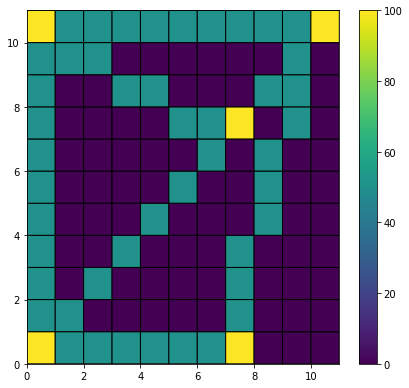

In [151]:
nd0 = (0,0)
nd1 = (10,0)
nd2 = (0,7)
nd3 = (7,7)
nd4 = (10,10)

loc1   = ( nd0, nd1, nd2, nd3, nd4 )
links1 = ( 'node0_1', 'node0_2', 'node0_3', 'node1_4', 'node1_3', 'node2_4', 'node3_4' )

sites1 = graph1(loc1, links1)
#print(sites1)

grd_x= 11
grd_y= 11
grid = np.zeros([grd_y,grd_x])

phero = 50
pmax  = 100

for site in sites1.values():
    for edge in list(site.values())[1:]:
        for i in edge:
            grid[i]= phero
            
for node in loc1:
    grid[node]= pmax    
    
#grid[sites['node0']['pos']]= pmax   

fig, ax= plt.subplots(1, 1, figsize=(7,6.5)) 
im= ax.pcolor(grid, edgecolors='k', linewidths=1, vmin=0, vmax= pmax)
cbar= fig.colorbar(im) 

plt.draw()

#### Impliment functions to create TSP code

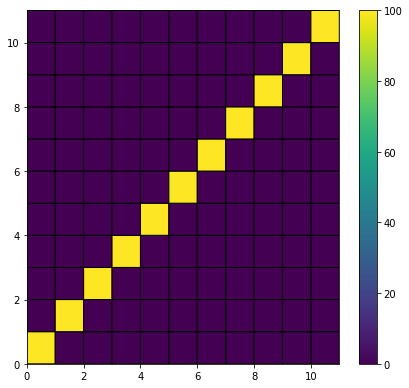

100


In [150]:
# 24/02/21

# Initialising grid
grd_x= 11
grd_y= 11
grid = np.zeros([grd_y,grd_x])

# Initialising pheromone variables
phero   = 1
pmax    = 100
pdiff   = 0.9
pdeprss = 20
# Depression factor based on longest path, used to set alpha for path picking

# Initialising time variables
dt  = 0.001
t_T = 100
t   = 0

# Initialising sites, node positions in form (y,x)
nd0 = (0,0)
nd1 = (10,0)
nd2 = (0,7)
nd3 = (7,7)
nd4 = (10,10)

# Setting up array of node and edges to intialise sites
loc = ( nd0, nd4 )
links = ('node0_1',)

#loc = ( nd0, nd1, nd4)
#links = ( 'node0_1', 'node0_2', 'node1_2')

#loc = ( nd0, nd1, nd2, nd3, nd4 )
#links = ( 'node0_1', 'node0_2', 'node0_3', 'node1_4', 'node1_3', 'node2_4', 'node3_4' )

# Call function to set up sites
sites = graph(loc, links)

# Adds paths to sites
sites['node0']['node2'] = ptp(nd0,nd1)+ptp(nd1,nd4)[1:]
sites['node1']['node2'] = sites['node0']['node2'][::-1]


# Setting up ant colony for Nants ants 
Nants  = 1
colony = add_colony({}, Nants, 'node0', sites)

# Setting pheromone on grid for paths in sites 
for site in sites.values():
    for edge in list(site.values())[1:]:
        for i in edge:
            grid[i]= phero

# Set site positions to max pheromone
for site in sites.values():
    grid[site['pos']]= pmax   

# Main loop
while t < t_T:
    # Counts time
    t += 1
    
    # Adds ant each tick
    colony = add_colony(colony, 1, 'node0', sites)
    
    # Reduces pheromone level by diffusion rate
    grid *= pdiff  
        
    # Ensures site positions are pheromone max
    for values in sites.values():        
        grid[values['pos']]= pmax 

    # Loops for all ants
    for n, ant in colony.items():
        # For all sites
        for node, site in sites.items():
            # If ant is at the site
            if ant['pos'] == site['pos']:
                
                # Sends pheromone signal back down path travelled, signal depends on path length
                for j in ant['path']:
                    grid[j] += pmax/(len(colony)*len(ant['path']))
                
                # Picks next path
                nxt_path = path_choice_SM(site, grid, t/pdeprss)
        
                # Set ants new path and position
                ant['path'] = site[nxt_path]
                ant['pos']  = site[nxt_path][1]
                
                # Increase pheromone for cell  ant is in now, limit to make pheromone
                if grid[ ant['pos']]< pmax:
                    grid[ ant['pos']]+= phero   
        
        # Otherwise, if not at site position updates to next position in ants path
        
        # Finds index in the path, the ant is at and adds one
        indx= ant['path'].index(ant['pos'])
        nxt_indx= indx + 1
        
        # Update ant position to the next index position   
        ant['pos'] = ant['path'][nxt_indx]
        
        # Updates pheromone, limit to max level
        if grid[ ant['pos']]< pmax:
            grid[ ant['pos']]+= phero 
     
    # Plots the grid
    clear_output(wait=True)
    
    fig, ax= plt.subplots(1, 1, figsize=(7,6.5)) 
    im= ax.pcolor(grid, edgecolors='k', linewidths=1, vmin=0, vmax= pmax)
    cbar= fig.colorbar(im) 
    
    plt.draw()
    plt.pause(dt)
    print(t)
    
    #for i in range(len(colony)):
        #print(colony[i]['pos']) 

### Days: 01/03/21-07/03/21: Defining functions and implimenting to TSP

#### Changing ant colony dictionary
- For TSP will need to keep not of the sites the ant has  yet to visit, the start node and the stops/ cells the ant has been to during its tour, as to retrace its path.

In [10]:
# 01/03/21

def add_colony_SM(colony, N, node, sites):
    '''Adds N ants at node 'pos' in sites dictionary, to the colony dictonary: This will be a nested dictonary of ants 
    0-N, they will each have a dictonary containing:
    
    Pos     The current position of the ant, tuple (y,x), at start will be the site they are initialised to
    Start   The start position of the ant, tuple (y,x), remaining unchanged
    Stops   List of tuples (y,x) of cells the ant has visited (not including sites)
    Path    The tuple list of tuples the ant will follow
    Index   The ants position in its path
    Sites   The sites the  ant is yet to visit
    
    Inputs:
    Colony  The colony dictonary to add ants to, can be empty or already populated
    N       Number of ants to add
    Node    The start node the ant begins at
    Sites   Sites dictonary containing all sites and paths '''
    
    # Loop adding N ants to the dictonary, finds size of existing colony array and adds N    
    for n in range(len(colony), len(colony) + N):
        colony['ant '+ str(n)] = { 
            'pos'   : sites.get(node)['pos'],
            'start' : sites.get(node)['pos'],
            'stops' : [sites.get(node)['pos']],
            'path'  : (),
            'index' : 0,
            'sites' : list (sites.keys()) } 
    
    return colony

#### Editing path sellection:
- Adding condition to take into account heristic path length of option as folows:

- In order to satisfy the constraint that an ant visits all the n different sites, each ant has a list containing the unvisited sites, we therefore will weight the ants probability to visit new sites before a tour have been completed. When a tour is completed, list is then emptied and the ant is free again to choose.

- We define visibility, $\eta_{ij}$, as the quantity $\frac{1}{d_{ij}}$ where $d_{ij}$ is the distance between site $ij$. From this we define the probability, $P_{ij}$ , of choosing edge from site $i$ to site $j$ for the $k^{th}$ ant as the normalised product of the visability $\eta_{ij}$ and the pheromone in the first cell of path $ij$, $\tau_{ij}$, giving the following equation; 

$$P_{ij}^k =\Bigg\{ \begin{matrix}\frac{\gamma\left(\tau_{ij}^\alpha\right)\cdot\left(\eta_{ij}^\beta\right)}{ \underset{k \in allow_k}{\sum} \left(\tau_{ij}^\alpha\right)\cdot\left(\eta_{ij}^\beta\right)} & for \quad j \in allowed_k \\
\frac{\left(\tau_{ij}^\alpha\right)\cdot\left(\eta_{ij}^\beta\right)}{ \underset{k \notin allow_k}{\sum} \left(\tau_{ij}^\alpha\right)\cdot\left(\eta_{ij}^\beta\right)} & otherwise  \end{matrix}$$

- where $allowed_k$ is the list of sites $i$ not visited and where $\alpha$ and $\beta$ are parameters that control the relative importance of pheromone versus visibility. 


- Therefore the transition probability is a trade-off between visibility (which says that close towns should be chosen with high probability, thus implementing a greedy constructive heuristic) and trail intensity at time t (that says that if on edge (i,j) there has been a lot of traffic then it is highly desirable, thus implementing them autocatalytic process).


In [11]:
# 01/03/21

def path_choice_SM(site, ant, grid, alpha, beta, gamma):
    ''' Chose path for ant to move along based on pheromone and path length,
    
    Input:
    site-   Site dictionary containing pos and paths out
    ant-    Ant Dictonary
    grid-   The grid array cointaining pheromone
    alpha-  Factor which controls importance of pheromone level
    beta-   Factor which controls importance of path length
    gamma-  which controls inportance of visiting new site'''
    
    # Initialising the options and probability arrays
    opt= []
    prob= []
    
    # Gets list of paths keys in site dictonary([1:] as first entry is the 'pos')
    edges= list(site.keys())[1:]

    # Loops for the paths in the site dictionary extracted:
    for edge in edges :
        # If the path isnt the path just travelled
        if site[edge][::-1] != ant['path']:
            #tau = grid[site[edge][1]] 
            tau = sum( map( lambda x: grid[x], site[edge][1:-1] ) )/len( site[edge][1:-1] )
            
            d = np.sqrt( (site[edge][0][0]-site[edge][-1][0])**2 + (site[edge][0][1]-site[edge][-1][1])**2 )
            eta = 1/d

            # If path to a node not visited 
            if edge in ant['sites']:
                # Appends the the path to opt and pheromone level in the first step of path to prob
                opt.append(edge)
                prob.append( gamma * (tau**alpha) * (eta**beta) )
            
            else:
                opt.append(edge)
                prob.append( (tau**alpha) * (eta**beta) )
    
    # Normalises the pheromones to one to give a probability
    p= (prob)/sum(prob)
    #print(p)
    
    # Picks move probablisitcally
    move= opt[np.random.choice(len(opt),p=p)]

    return move

#### Impliementing changes to loop
- Dispersing ants at each node, using new prob function
- Only using one ant to monitor whether it is moving correctly 
- Once all cities visited, retrace path

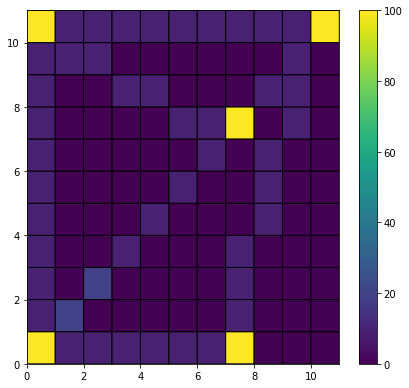

1
((0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7))


In [39]:
# 01/03/21

# Initialising grid
grd_x= 11
grd_y= 11
grid = np.zeros([grd_y,grd_x])

# Initialising pheromone variables
phero   = 10
pmax    = 100
pdiff   = 0.9
# Depression factor based on longest path, used to set alpha for path picking

# Initialising time variables
dt  = 0.001
t_T = 250
t   = 0

# Initialise probability variables
alpha = 1
beta  = 1
gamma = 10

# Initialising sites, node positions in form (y,x)
nd0 = (0,0)
nd1 = (10,0)
nd2 = (0,7)
nd3 = (7,7)
nd4 = (10,10)

# Setting up array of node and edges to intialise sites
loc = ( nd0, nd1, nd2, nd3, nd4 )
links = ( 'node0_1', 'node0_2', 'node0_3', 'node1_4', 'node1_3', 'node2_4', 'node3_4' )

# Call function to set up sites
sites = graph(loc, links)

# Setting up ant colony for Nants ants 
Nants  = 1
colony = add_colony_SM({}, Nants, 'node0', sites)

# Setting pheromone on grid for paths in sites 
for site in sites.values():
    for edge in list(site.values())[1:]:
        for i in edge:
            grid[i]= phero

# Set site positions to max pheromone
for site in sites.values():
    grid[site['pos']]= pmax  
    
# Main loop
while t < t_T:
    # Counts time
    t += 1
    
    # Reduces pheromone level by diffusion rate
    grid *= pdiff   
    
    # Ensures site positions are pheromone max
    for values in sites.values():        
        grid[values['pos']]= pmax 

    # Loops for all ants, n
    for n, ant in colony.items():
        
        # For each node in sites dictonary 
        for node, site in sites.items():
            
            # If ant is at the site
            if ant['pos'] == site['pos']:

                # Removes site from available locations
                if node in ant['sites']: 
                    ant['sites'].remove(node)
                
                # Remove pos from the retrace
                ant['stops'].remove(site['pos'])
                
                # If ant has been all sites
                if len(ant['sites']) == 0:

                    # If its back at the start of its tour, will reset the ant
                    if ant['pos'] == ant['start']:                       
                        # Resets ant variables that changed during tour
                        ant['stops'] = [site['pos']]
                        ant['path']  = (ant['pos'],)
                        ant['sites'] = list (sites.keys())
                        
                        # -1 as next index of path needs to be 0, as this keeps ant in cell to restart tour
                        ant['index'] = -1
                        
                    else:
                        # Retraces steps, retrace path doesn't contain any sites except start
                        # So once set will not re-enter this loop before resetting
                        
                        # Reverse stops visited and add start point at end to create new path
                        retrace= ant['stops'][::-1]
                        retrace.append(ant['start'])
                        
                        # Set path to follow as the retrace
                        ant['path'] = tuple(retrace)
                        ant['pos']  = ant['path'][0]
                        ant['index'] = 0
                
                # If ant hasn't been all sites
                else:
                    # Picks next path
                    nxt_path = path_choice_SM(site, ant, grid, alpha, beta, gamma)
                    
                    # Set ants new path and position and adds the pos to stops list
                    ant['path'] = site[nxt_path]
                    ant['pos']  = site[nxt_path][1]
                    ant['stops']. append(ant['pos'])
                    ant['index'] = 1                    
                    # Increase pheromone for cell  ant is in now, limit to make pheromone
                    if grid[ ant['pos']]< pmax:
                        grid[ ant['pos']]+= phero   
        
        # Ants not at node follow there path        
        ant['index'] += 1
        
        # Update ant position to the next index position, and adds the pos to stops list
        ant['pos'] = ant['path'][ant['index']]
        ant['stops'].append(ant['pos'])
        
        # Updates pheromone, limit to max level
        if grid[ ant['pos']]< pmax:
            grid[ ant['pos']]+= phero 
                    
    clear_output(wait=True)
    
    # Updates plot
    fig, ax= plt.subplots(1, 1, figsize=(7,6.5)) 
    im= ax.pcolor(grid, edgecolors='k', linewidths=1, vmin=0, vmax= pmax)
    cbar= fig.colorbar(im) 
    
    plt.draw()
    plt.pause(dt)
    print(t)
    
    #for i in range(len(colony)):
        #print(colony[i]['pos']) 
    print(colony['ant 0']['path'])

#### Refining loop
- Applying to more ants, only updating pheromone when the ant has visited all cities and begins retracing the path

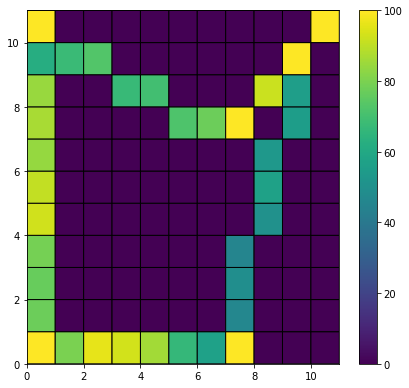

250


In [48]:
# 01/03/21

# Initialising grid
grd_x= 11
grd_y= 11
grid = np.zeros([grd_y,grd_x])

# Initialising pheromone variables
phero   = 1
pmax    = 100
pdiff   = 0.75
# Depression factor based on longest path, used to set alpha for path picking

# Initialising time variables
dt  = 0.001
t_T = 250
t   = 0

# Initialise probability variables
alpha = 2
beta  = 1.5
gamma = 10

# Initialising sites, node positions in form (y,x)
nd0 = (0,0)
nd1 = (10,0)
nd2 = (0,7)
nd3 = (7,7)
nd4 = (10,10)

# Setting up array of node and edges to intialise sites
#loc = ( nd0, nd1, nd4)
#links = ( 'node0_1', 'node0_2', 'node1_2')
loc = ( nd0, nd1, nd2, nd3, nd4 )
links = ( 'node0_1', 'node0_2', 'node0_3', 'node1_4', 'node1_3', 'node2_4', 'node3_4' )

# Call function to set up sites
sites = graph(loc, links)

# Setting up ant colony for Nants ants 
Nants  = 20
for site in sites.keys():
    colony = add_colony_SM(  {}  , Nants, site, sites)
    
# Setting pheromone on grid for paths in sites 
for site in sites.values():
    for edge in list(site.values())[1:]:
        for i in edge:
            grid[i]= phero

# Set site positions to max pheromone
for site in sites.values():
    grid[site['pos']]= pmax  
    
# Main loop
while t < t_T:
    # Counts time
    t += 1
      
    # Adds ant each tick at random site
    colony = add_colony_SM(colony, 5, 'node'+ str(np.random.randint(len(loc))), sites)
    
    # Reduces pheromone level by diffusion rate
    grid *= pdiff   
    
    # Ensures site positions are pheromone max
    for values in sites.values():        
        grid[values['pos']]= pmax 

    # Loops for all ants, n
    for n, ant in colony.items():
        
        # For each node in sites dictonary 
        for node, site in sites.items():
            
            # If ant is at the site
            if ant['pos'] == site['pos']:

                # Removes site from available locations
                if node in ant['sites']: 
                    ant['sites'].remove(node)
                
                # Remove pos from the retrace
                ant['stops'].remove(site['pos'])
                
                # If ant has been all sites
                if len(ant['sites']) == 0:

                    # If its back at the start of its tour, will reset the ant
                    if ant['pos'] == ant['start']:                       
                        # Resets ant variables that changed during tour
                        ant['stops'] = [site['pos']]
                        ant['path']  = (ant['pos'],)
                        ant['sites'] = list (sites.keys())
                        
                         # -1 as next index of path needs to be 0, as this keeps ant in cell to restart tour
                        ant['index'] = -1
                        
                    else:
                        # Retraces steps, retrace path doesn't contain any sites except start
                        # So once set will not re-enter this loop before resetting
                        
                        # Reverse stops visited and add start point at end to create new path
                        retrace= ant['stops'][::-1]
                        retrace.append(ant['start'])
                        
                        # Set path to follow as the retrace
                        ant['path'] = tuple(retrace)
                        ant['pos']  = ant['path'][0]
                        
                        # Reset path index
                        ant['index'] = 0
                
                # If ant hasn't been all sites
                else:
                    # Picks next path
                    nxt_path = path_choice_SM(site, ant, grid, alpha, beta, gamma)
                    
                    # Set ants new path and position and adds the pos to stops list
                    ant['path'] = site[nxt_path]
                    ant['pos']  = site[nxt_path][1]
                    ant['stops']. append(ant['pos'])
                    
                    # Set path index
                    ant['index'] = 1                     
        
        # Ants not at node follow there path   
        # Moves to next index
        ant['index']+=1
        
        # Update ant position to the next index position, and adds the pos to stops list
        ant['pos'] = ant['path'][ant['index']]
        ant['stops'].append(ant['pos'])
        
        # Updates pheromone, limit to max level when retracing
        if grid[ ant['pos']]< pmax and len(ant['sites']) == 0 :
            grid[ ant['pos']]+= phero 
                    
    clear_output(wait=True)
    
    # Updates plot
    fig, ax= plt.subplots(1, 1, figsize=(7,6.5)) 
    im= ax.pcolor(grid, edgecolors='k', linewidths=1, vmin=0, vmax= pmax)
    cbar= fig.colorbar(im) 
    
    plt.draw()
    plt.pause(dt)
    print(t)
    
    #for i in range(len(colony)):
        #print(colony[i]['pos']) 

### Days: 07/03/21 - 14/03/21:  Test on multiple graphs

#### Testing other graphs
- This graph is a good level of complexity and solution found relatively quickly, will use this to test for optimal parameters  
- Add specific check for this graph to return if correct path is found

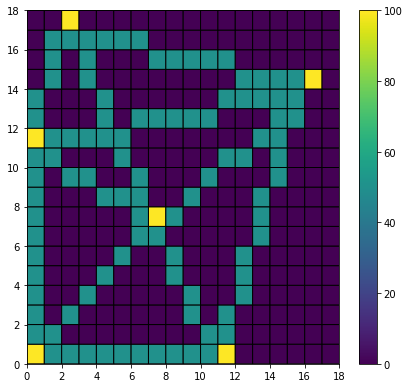

In [113]:
# 08/03/21

# Call function to set up sites
nd0 = (0,0)
nd1 = (11,0)
nd2 = (0,11)
nd3 = (7,7)
nd4 = (14,16)
nd5 = (17,2)

# Setting up array of node and edges to intialise sites
loc1   = (nd0, nd1, nd2, nd3, nd4, nd5)
links1 = ('node0_1', 'node0_2', 'node0_3', 'node1_3', 'node1_4', 'node1_5', 'node2_3', 'node2_4', 'node3_4', 'node3_5',
          'node3_5', 'node4_5')

# Calling function to create sites dictonary
sites1 = graph(loc1, links1)
#print(sites1)

# Re-initialising grid and pheromone for plotting
grd_x= 18
grd_y= 18
grid = np.zeros([grd_y,grd_x])

phero = 50
pmax  = 100

# Setting pheromone on grid for paths in sites 
for site in sites1.values():
    for edge in list(site.values())[1:]:
        for i in edge:
            grid[i]= phero

# Set site positions to max pheromone
for site in sites1.values():
    grid[site['pos']]= pmax      

# Plots graph
fig, ax= plt.subplots(1, 1, figsize=(7,6.5)) 
im= ax.pcolor(grid, edgecolors='k', linewidths=1, vmin=0, vmax= pmax)
cbar= fig.colorbar(im) 

plt.draw()

In [467]:
# Initialise probability variables
alpha = 2
beta  = 3
gamma = 30
t_T = 1000
pdiff  = 0.75
Nants  = 50

# Initialising grid
grd_x= 18
grd_y= 18
grid = np.zeros([grd_y,grd_x])

# Initialising pheromone variables
phero   = 1
pmax    = 100

# Initialising time variables
dt  = 0.001
t   = 0

solution = 'null'
solved = False
tol = 0.9

# Initialising sites, node positions in form (y,x)
nd0 = (0,0)
nd1 = (11,0)
nd2 = (0,11)
nd3 = (7,7)
nd4 = (14,16)
nd5 = (17,2) 

# Setting up array of node and edges to intialise sites
loc   = (nd0, nd1, nd2, nd3, nd4, nd5)
links = ('node0_1', 'node0_2', 'node0_3', 'node1_3', 'node1_4', 'node1_5', 'node2_3', 'node2_4', 'node3_4', 'node3_5',
          'node3_5', 'node4_5')

# Call function to set up sites
sites = graph(loc, links)

# Initialise paths to check solution
correct_path = (sites['node0']['node1'][1:-1] + sites['node1']['node5'][1:-1] + sites['node5']['node4'][1:-1] +
                sites['node4']['node3'][1:-1] + sites['node3']['node2'][1:-1] + sites['node2']['node0'][1:-1])

other_path =  ( sites['node3']['node0'][1:-1] + sites['node3']['node1'][1:-1] +  sites['node3']['node5'][1:-1] 
              + sites['node2']['node4'][1:-1] + sites['node1']['node4'][1:-1] )


# Setting up ant colony for Nants ants 
for site in sites.keys():
    colony = add_colony_SM(  {}  , Nants, site, sites)

# Setting pheromone on grid for paths in sites 
for site in sites.values():
    for edge in list(site.values())[1:]:
        for i in edge:
            grid[i]= phero

# Set site positions to max pheromone
for site in sites.values():
    grid[site['pos']]= pmax  
    
# Main loop
while t < t_T and solved == False:
    # Counts time
    t += 1
      
    # Adds ant each tick
    colony = add_colony_SM(colony, 5, 'node'+ str(np.random.randint(len(loc))), sites)
    
    # Reduces pheromone level by diffusion rate
    grid *= pdiff   
    
    # Ensures site positions are pheromone max
    for values in sites.values():        
        grid[values['pos']]= pmax 

    # Loops for all ants, n
    for n, ant in colony.items():
        
        # For each node in sites dictonary 
        for node, site in sites.items():
            
            # If ant is at the site
            if ant['pos'] == site['pos']:

                # Removes site from available locations
                if node in ant['sites']: 
                    ant['sites'].remove(node)
                
                # Remove pos from the retrace
                ant['stops'].remove(site['pos'])
                
                # If ant has been all sites
                if len(ant['sites']) == 0:

                    # If its back at the start of its tour, will reset the ant
                    if ant['pos'] == ant['start']:                       
                        # Resets ant variables that changed during tour
                        ant['stops'] = [site['pos']]
                        ant['path']  = (ant['pos'],)
                        ant['sites'] = list (sites.keys())
                        
                         # -1 as next index of path needs to be 0, as this keeps ant in cell to restart tour
                        ant['index'] = -1
                        
                    else:
                        # Retraces steps, retrace path doesn't contain any sites except start
                        # So once set will not re-enter this loop before resetting
                        
                        # Reverse stops visited and add start point at end to create new path
                        retrace= ant['stops'][::-1]
                        retrace.append(ant['start'])
                        
                        # Set path to follow as the retrace
                        ant['path'] = tuple(retrace)
                        ant['pos']  = ant['path'][0]
                        
                        # Reset index for path
                        ant['index'] = 0
                
                # If ant hasn't been all sites
                else:
                    # Picks next path
                    nxt_path = path_choice_SM(site, ant, grid, alpha, beta, gamma)
                    
                    # Set ants new path and position and adds the pos to stops list
                    ant['path'] = site[nxt_path]
                    ant['pos']  = site[nxt_path][1]
                    ant['stops']. append(ant['pos'])
                    
                    # Set path index
                    ant['index'] = 1                
                    
        # Ants not at node follow there path    
        # Loops to next path index
        ant['index'] += 1
        
        # Update ant position to the next index position, and adds the pos to stops list
        ant['pos'] = ant['path'][ant['index']]
        ant['stops'].append(ant['pos'])
        
        # Updates pheromone, limit to max level when retracing
        if grid[ ant['pos']]< pmax and len(ant['sites']) == 0 :
            grid[ ant['pos']]+= phero 
                    
    clear_output(wait=True)
    
    # Updates plot
    fig, ax= plt.subplots(1, 1, figsize=(7,6.5)) 
    im= ax.pcolor(grid, edgecolors='k', linewidths=1, vmin=0, vmax= pmax)
    cbar= fig.colorbar(im) 
    
    plt.draw()
    plt.pause(dt)
    print(t)
    
    # Finds density over correct path and grid 
    density_c = sum( map(lambda x: grid[x], correct_path)) / len(correct_path)
    density_o = sum( map(lambda x: grid[x], other_path  )) / len(other_path)
    density_T = density_c + density_o
    
    # print(density_c, density_o, density_c/density_T)
    
    # If the density is above threeshold/ tolerence set, simulation is stopped
    if density_c/density_T > tol and density_c > pmax*0.5 :
        solved   = True
        solution = 'Found'

print('Optimal  path' ,solution, '. Found in',t,'s') 

Optimam  path found . Found in 306 s


#### More tests
- Testing the code for a larger graph, we see the time for solution scales with size of grid. This will be explored later

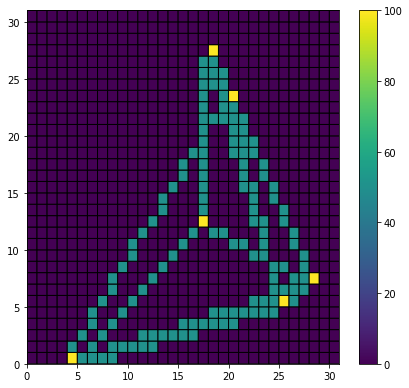

In [114]:
# 10/03/21

# Initialising sites, node positions in form (y,x)
nd0 = (12, 17)
nd1 = (0, 4)
nd2 = (27, 18)
nd3 = (7, 28)
nd4 = (5, 25)
nd5 = (23, 20) 

# Setting up array of node and edges to intialise sites
loc   = (nd0, nd1, nd2, nd3, nd4, nd5)
links = ('node0_1', 'node0_2', 'node0_3', 'node1_3', 'node1_4', 'node1_5', 'node2_3', 'node2_4', 'node3_4', 'node3_5',
          'node3_5', 'node4_5')

sites1 = graph(loc, links)
#print(sites1)

# Re-initialising grid and pheromone for plotting
grd_x= 31
grd_y= 31
grid = np.zeros([grd_y,grd_x])

phero = 50
pmax  = 100

# Setting pheromone on grid for paths in sites 
for site in sites1.values():
    for edge in list(site.values())[1:]:
        for i in edge:
            grid[i]= phero

# Set site positions to max pheromone
for site in sites1.values():
    grid[site['pos']]= pmax      

# Plots graph
fig, ax= plt.subplots(1, 1, figsize=(7,6.5)) 
im= ax.pcolor(grid, edgecolors='k', linewidths=1, vmin=0, vmax= pmax)
cbar= fig.colorbar(im) 

plt.draw()

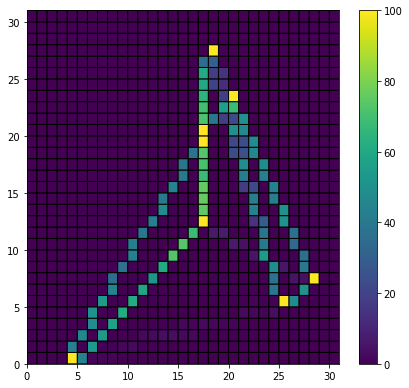

500


In [103]:
# 10/03/21

# Initialising grid
grd_x= 31
grd_y= 31
grid = np.zeros([grd_y,grd_x])

# Initialising pheromone variables
phero   = 1
pmax    = 100
pdiff   = 0.75
pdeprss = 20
# Depression factor based on longest path, used to set alpha for path picking

# Initialising time variables
dt  = 0.001
t_T = 500
t   = 0

# Initialise probability variables
alpha = 2
beta  = 3
gamma = 30

# Initialising sites, node positions in form (y,x)
nd0 = (12, 17)
nd1 = (0, 4)
nd2 = (27, 18)
nd3 = (7, 28)
nd4 = (5, 25)
nd5 = (23, 20) 

# Setting up array of node and edges to intialise sites
loc   = (nd0, nd1, nd2, nd3, nd4, nd5)
links = ('node0_1', 'node0_2', 'node0_3', 'node1_3', 'node1_4', 'node1_5', 'node2_3', 'node2_4', 'node3_4', 'node3_5',
          'node3_5', 'node4_5')

# Call function to set up sites
sites = graph(loc, links)

# Setting up ant colony for Nants ants 
Nants  = 50
for site in sites.keys():
    colony = add_colony_SM(  {}  , Nants, site, sites)

# Setting pheromone on grid for paths in sites 
for site in sites.values():
    for edge in list(site.values())[1:]:
        for i in edge:
            grid[i]= phero

# Set site positions to max pheromone
for site in sites.values():
    grid[site['pos']]= pmax  
    
# Main loop
while t < t_T:
    # Counts time
    t += 1
      
    # Adds ant each tick
    colony = add_colony_SM(colony, 5, 'node'+ str(np.random.randint(len(loc))), sites)
    
    # Reduces pheromone level by diffusion rate
    grid *= pdiff   
    
    # Ensures site positions are pheromone max
    for values in sites.values():        
        grid[values['pos']]= pmax 

    # Loops for all ants, n
    for n, ant in colony.items():
        
        # For each node in sites dictonary 
        for node, site in sites.items():
            
            # If ant is at the site
            if ant['pos'] == site['pos']:

                # Removes site from available locations
                if node in ant['sites']: 
                    ant['sites'].remove(node)
                
                # Remove pos from the retrace
                ant['stops'].remove(site['pos'])
                
                # If ant has been all sites
                if len(ant['sites']) == 0:

                    # If its back at the start of its tour, will reset the ant
                    if ant['pos'] == ant['start']:                       
                        # Resets ant variables that changed during tour
                        ant['stops'] = [site['pos']]
                        ant['path']  = (ant['pos'],)
                        ant['sites'] = list (sites.keys())
                        
                         # -1 as next index of path needs to be 0, as this keeps ant in cell to restart tour
                        ant['index'] = -1
                        
                    else:
                        # Retraces steps, retrace path doesn't contain any sites except start
                        # So once set will not re-enter this loop before resetting
                        
                        # Reverse stops visited and add start point at end to create new path
                        retrace= ant['stops'][::-1]
                        retrace.append(ant['start'])
                        
                        # Set path to follow as the retrace
                        ant['path'] = tuple(retrace)
                        ant['pos']  = ant['path'][0]
                        
                        # Reset index for path
                        ant['index'] = 0
                
                # If ant hasn't been all sites
                else:
                    # Picks next path
                    nxt_path = path_choice_SM(site, ant, grid, alpha, beta, gamma)
                    
                    # Set ants new path and position and adds the pos to stops list
                    ant['path'] = site[nxt_path]
                    ant['pos']  = site[nxt_path][1]
                    ant['stops']. append(ant['pos'])
                    
                    # Set path index
                    ant['index'] = 1                
                    
        # Ants not at node follow there path    
        # Loops to next path index
        ant['index']+=1
        
        # Update ant position to the next index position, and adds the pos to stops list
        ant['pos'] = ant['path'][ant['index']]
        ant['stops'].append(ant['pos'])
        
        # Updates pheromone, limit to max level when retracing
        if grid[ ant['pos']]< pmax and len(ant['sites']) == 0 :
            grid[ ant['pos']]+= phero 
                    
    clear_output(wait=True)
    
    # Updates plot
    fig, ax= plt.subplots(1, 1, figsize=(7,6.5)) 
    im= ax.pcolor(grid, edgecolors='k', linewidths=1, vmin=0, vmax= pmax)
    cbar= fig.colorbar(im) 
    
    plt.draw()
    plt.pause(dt)
    print(t)
    
    #for i in range(len(colony)):
        #print(colony[i]['pos']) 

##### Code to randomly set graph positions
- Using this to visually analyse random graphs and check the optimisation

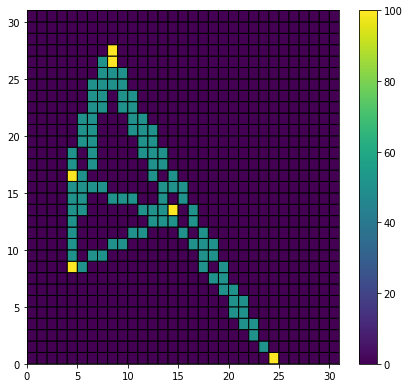

In [118]:
# 11/03/21

# Re-initialising grid and pheromone for plotting
grd_x= 31
grd_y= 31
grid = np.zeros([grd_y,grd_x])

phero = 50
pmax  = 100

# Initialising sites, node positions in form (y,x)
nd0 = (np.random.randint(grd_y), np.random.randint(grd_x))
nd1 = (np.random.randint(grd_y), np.random.randint(grd_x))
nd2 = (np.random.randint(grd_y), np.random.randint(grd_x))
nd3 = (np.random.randint(grd_y), np.random.randint(grd_x))
nd4 = (np.random.randint(grd_y), np.random.randint(grd_x))
nd5 = (np.random.randint(grd_y), np.random.randint(grd_x))

# Setting up array of node and edges to intialise sites
loc   = (nd0, nd1, nd2, nd3, nd4, nd5)
links = ('node0_1', 'node0_2', 'node0_3', 'node1_3', 'node1_4', 'node1_5', 'node2_3', 'node2_4', 'node3_4', 'node3_5',
          'node3_5', 'node4_5')

sitesrd = graph(loc, links)
#print(sites1)

# Setting pheromone on grid for paths in sites 
for site in sitesrd.values():
    for edge in list(site.values())[1:]:
        for i in edge:
            grid[i]= phero

# Set site positions to max pheromone
for site in sitesrd.values():
    grid[site['pos']]= pmax      

# Plots graph
fig, ax= plt.subplots(1, 1, figsize=(7,6.5)) 
im= ax.pcolor(grid, edgecolors='k', linewidths=1, vmin=0, vmax= pmax)
cbar= fig.colorbar(im) 

plt.draw()

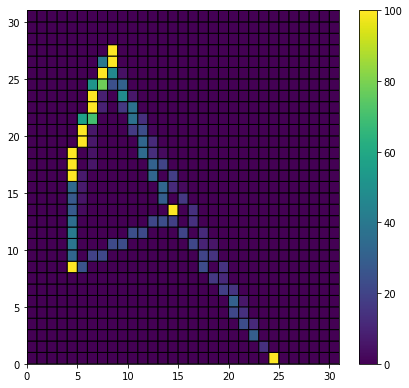

500


In [120]:
# 11/03/21
# Site initialised above is used below:

# Initialising pheromone variables
phero   = 1
pmax    = 100
pdiff   = 0.65
# Depression factor based on longest path, used to set alpha for path picking

# Initialising time variables
dt  = 0.001
t_T = 500
t   = 0

# Initialise probability variables
alpha = 2.5
beta  = 3
gamma = 30

# Call function to set up sites
sitesrd = graph(loc, links)

# Setting up ant colony for Nants ants 
Nants  = 50
for site in sitesrd.keys():
    colony = add_colony_SM(  {}  , Nants, site, sitesrd)
    
# Setting pheromone on grid for paths in sites 
for site in sitesrd.values():
    for edge in list(site.values())[1:]:
        for i in edge:
            grid[i]= phero
            
# Set site positions to max pheromone
for site in sitesrd.values():
    grid[site['pos']]= pmax 
    
# Main loop
while t < t_T:
    # Counts time
    t += 1
      
    # Adds ant each tick
    colony = add_colony_SM(colony, 5, 'node'+ str(np.random.randint(len(loc))), sitesrd)
    
    # Reduces pheromone level by diffusion rate
    grid *= pdiff   
    
    # Ensures site positions are pheromone max
    for values in sitesrd.values():        
        grid[values['pos']]= pmax 

    # Loops for all ants, n
    for n, ant in colony.items():
        
        # For each node in sites dictonary 
        for node, site in sitesrd.items():
            
            # If ant is at the site
            if ant['pos'] == site['pos']:

                # Removes site from available locations
                if node in ant['sites']: 
                    ant['sites'].remove(node)
                
                # Remove pos from the retrace
                ant['stops'].remove(site['pos'])
                
                # If ant has been all sites
                if len(ant['sites']) == 0:

                    # If its back at the start of its tour, will reset the ant
                    if ant['pos'] == ant['start']:                       
                        # Resets ant variables that changed during tour
                        ant['stops'] = [site['pos']]
                        ant['path']  = (ant['pos'],)
                        ant['sites'] = list (sites.keys())
                        
                         # -1 as next index of path needs to be 0, as this keeps ant in cell to restart tour
                        ant['index'] = -1
                        
                    else:
                        # Retraces steps, retrace path doesn't contain any sites except start
                        # So once set will not re-enter this loop before resetting
                        
                        # Reverse stops visited and add start point at end to create new path
                        retrace= ant['stops'][::-1]
                        retrace.append(ant['start'])
                        
                        # Set path to follow as the retrace
                        ant['path'] = tuple(retrace)
                        ant['pos']  = ant['path'][0]
                        
                        # Reset index for path
                        ant['index'] = 0
                
                # If ant hasn't been all sites
                else:
                    # Picks next path
                    nxt_path = path_choice_SM(site, ant, grid, alpha, beta, gamma)
                    
                    # Set ants new path and position and adds the pos to stops list
                    ant['path'] = site[nxt_path]
                    ant['pos']  = site[nxt_path][1]
                    ant['stops']. append(ant['pos'])
                    
                    # Set path index
                    ant['index'] = 1                
                    
        # Ants not at node follow there path    
        # Loops to next path index
        ant['index']+=1
        
        # Update ant position to the next index position, and adds the pos to stops list
        ant['pos'] = ant['path'][ant['index']]
        ant['stops'].append(ant['pos'])
        
        # Updates pheromone, limit to max level when retracing
        if grid[ ant['pos']]< pmax and len(ant['sites']) == 0 :
            grid[ ant['pos']]+= phero 
                    
    clear_output(wait=True)
    
    # Updates plot
    fig, ax= plt.subplots(1, 1, figsize=(7,6.5)) 
    im= ax.pcolor(grid, edgecolors='k', linewidths=1, vmin=0, vmax= pmax)
    cbar= fig.colorbar(im) 
    
    plt.draw()
    plt.pause(dt)
    print(t)
    
    #for i in range(len(colony)):
        #print(colony[i]['pos']) 

##### Larger more complex grid to test limits on complexity it can handle
- May look further later, want to see how the method scales for sizes and connections

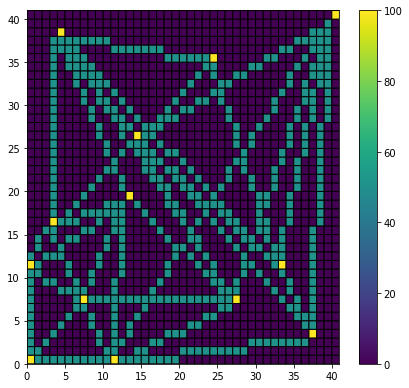

In [87]:
# 13/03/21
grd_x= 41
grd_y= 41

# Initialising sites, node positions in form (y,x)
nd0 = (0,0)
nd1 = (11,0)
nd2 = (0,11)
nd3 = (7,7)
nd4 = (19,13)
nd5 = (7,27)
nd6 = (16,3)
nd7 = (38,4)
nd8 = (26,14)
nd9 = (11,33)
nd10= (35,24)
nd11= (3,37)
nd12= (40,40)

# Setting up array of node and edges to intialise sites
loc   = (nd0, nd1, nd2, nd3, nd4, nd5, nd6, nd7, nd8, nd9, nd10, nd11, nd12)
links = ('node0_1', 'node0_2', 'node0_3', 'node1_3', 'node1_4', 'node1_6', 'node2_3', 'node2_4', 'node2_11','node2_12'
         ,'node2_5','node3_4',  'node3_5', 'node3_6', 'node3_6', 'node4_5', 'node4_6', 'node4_7', 'node5_7', 'node5_8'
         , 'node5_12', 'node6_7', 'node6_10', 'node7_8', 'node7_9', 'node8_9', 'node8_11', 'node8_12', 'node9_10', 
           'node9_12', 'node9_11', 'node10_7','node11_12')

sites1 = graph(loc, links)
#print(sites1)

grid = np.zeros([grd_y,grd_x])

phero = 50
pmax  = 100

for site in sites1.values():
    for edge in list(site.values())[1:]:
        for i in edge:
            grid[i]= phero

for node in loc:
    grid[node]= pmax      
    
#grid[sites['node0']['pos']]= pmax   

fig, ax= plt.subplots(1, 1, figsize=(7,6.5)) 
im= ax.pcolor(grid, edgecolors='k', linewidths=1, vmin=0, vmax= pmax)
cbar= fig.colorbar(im) 

plt.draw()

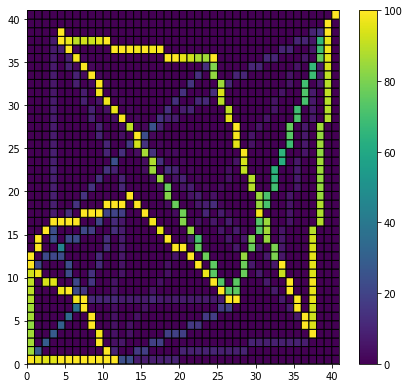

500


In [91]:
# 13/03/21

# Initialising grid
grd_x= 41
grd_y= 41
grid = np.zeros([grd_y,grd_x])

# Initialising pheromone variables
phero   = 1
ptotal  = 0
pmax    = 100
pdiff   = 0.95
pdeprss = 20
# Depression factor based on longest path, used to set alpha for path picking

# Initialising time variables
dt  = 0.001
t_T = 500
t   = 0

# Initialise probability variables
alpha = 4
beta  = 2.5
gamma = 20

# Initialising sites, node positions in form (y,x)
nd0 = (0,0)
nd1 = (11,0)
nd2 = (0,11)
nd3 = (7,7)
nd4 = (19,13)
nd5 = (7,27)
nd6 = (16,3)
nd7 = (38,4)
nd8 = (26,14)
nd9 = (11,33)
nd10= (35,24)
nd11= (3,37)
nd12= (40,40)

# Setting up array of node and edges to intialise sites
loc   = (nd0, nd1, nd2, nd3, nd4, nd5, nd6, nd7, nd8, nd9, nd10, nd11, nd12)
links = ('node0_1', 'node0_2', 'node0_3', 'node1_3', 'node1_4', 'node1_6', 'node2_3', 'node2_4', 'node2_11','node2_12'
         ,'node2_5','node3_4',  'node3_5', 'node3_6', 'node3_6', 'node4_5', 'node4_6', 'node4_7', 'node5_7', 'node5_8'
         , 'node5_12', 'node6_7', 'node6_10', 'node7_8', 'node7_9', 'node8_9', 'node8_11', 'node8_12', 'node9_10', 
           'node9_12', 'node9_11', 'node10_7','node11_12')

# Call function to set up sites
sites = graph(loc, links)

# Setting up ant colony for Nants ants 
Nants  = 50
for site in sites.keys():
    colony = add_colony_SM(  {}  , Nants, site, sites)

# Setting pheromone on grid for paths in sites 
for site in sites.values():
    for edge in list(site.values())[1:]:
        for i in edge:
            grid[i]= phero

# Set site positions to max pheromone
for site in sites.values():
    grid[site['pos']]= pmax  
    
# Main loop
while t < t_T:
    # Counts time
    t += 1
      
    # Adds ant each tick
    colony = add_colony_SM(colony, 5, 'node'+ str(np.random.randint(len(loc))), sites)
    
    # Reduces pheromone level by diffusion rate
    grid *= pdiff   
    
    # Ensures site positions are pheromone max
    for values in sites.values():        
        grid[values['pos']]= pmax 

    # Loops for all ants, n
    for n, ant in colony.items():
        
        # For each node in sites dictonary 
        for node, site in sites.items():
            
            # If ant is at the site
            if ant['pos'] == site['pos']:

                # Removes site from available locations
                if node in ant['sites']: 
                    ant['sites'].remove(node)
                
                # Remove pos from the retrace
                ant['stops'].remove(site['pos'])
                
                # If ant has been all sites
                if len(ant['sites']) == 0:

                    # If its back at the start of its tour, will reset the ant
                    if ant['pos'] == ant['start']:                       
                        # Resets ant variables that changed during tour
                        ant['stops'] = [site['pos']]
                        ant['path']  = (ant['pos'],)
                        ant['sites'] = list (sites.keys())
                        
                         # -1 as next index of path needs to be 0, as this keeps ant in cell to restart tour
                        ant['index'] = -1
                        
                    else:
                        # Retraces steps, retrace path doesn't contain any sites except start
                        # So once set will not re-enter this loop before resetting
                        
                        # Reverse stops visited and add start point at end to create new path
                        retrace= ant['stops'][::-1]
                        retrace.append(ant['start'])
                        
                        # Set path to follow as the retrace
                        ant['path'] = tuple(retrace)
                        ant['pos']  = ant['path'][0]
                        
                        # Reset index for path
                        ant['index'] = 0
                
                # If ant hasn't been all sites
                else:
                    # Picks next path
                    nxt_path = path_choice_SM(site, ant, grid, alpha, beta, gamma)
                    
                    # Set ants new path and position and adds the pos to stops list
                    ant['path'] = site[nxt_path]
                    ant['pos']  = site[nxt_path][1]
                    ant['stops']. append(ant['pos'])
                    
                    # Set path index
                    ant['index'] = 1                
                    
        # Ants not at node follow there path    
        # Loops to next path index
        ant['index']+=1
        
        # Update ant position to the next index position, and adds the pos to stops list
        ant['pos'] = ant['path'][ant['index']]
        ant['stops'].append(ant['pos'])
        
        # Updates pheromone, limit to max level when retracing
        if grid[ ant['pos']]< pmax and len(ant['sites']) == 0 :
            grid[ ant['pos']]+= phero 
                    
    clear_output(wait=True)
    
    # Updates plot
    fig, ax= plt.subplots(1, 1, figsize=(7,6.5)) 
    im= ax.pcolor(grid, edgecolors='k', linewidths=1, vmin=0, vmax= pmax)
    cbar= fig.colorbar(im) 
    
    plt.draw()
    plt.pause(dt)
    print(t)
    
    #for i in range(len(colony)):
        #print(colony[i]['pos']) 

## Further Code: Testing to optimise Variables:

### Day: 14/03/21:

#### Functionalising code for alpha
- Turned two path model into a function that can be called and run for different values of grid size, pheromone, diffusion, ant numbers, etc.
- This functiin runs using a constant alpha valu rather than varying probability function with time, this is to compare the alpha implimentation with the depression implimentation
- The function runs for a variable short diagonal and long perimenter path as used in the simple code section

In [433]:
# 14/03/21

def AntOptimisation_alpha(x0, y0, grd_x, grd_y, phero, pmax, pdiff, alpha, t_T, tol, Nants, add_ants):
    '''Function to evaluate two path system using alpha for the probability function. takes in the various variables
    Returns:
    solved-    Boolean for if solution is found 
    solution-  The solution that is found(long/short)
    t-         Time taken
    grid-      The grid array at end of simulation'''
    
    # Initialising grid
    grid = np.zeros([grd_y,grd_x])

    # Initialising path- use tuples as easier to use to index, in form (y,x)
    short = ptp((0,0),(y0,x0))
    long  = ptp((0,0),(y0,0)) + ptp((y0,0),(y0,x0))[1:]

    # Initialising time variables
    dt  = 0.001
    t   = 0
    solved = False
    solution = 'null'

    # Initialising sites array with positions and arrays of paths away
    sites = {'nest': {
             'pos' : short[0],
              0    : short,
              1    : long },  

             'food': {
             'pos' : short[::-1][0],
              0    : short[::-1],
              1    : long[::-1] } }

    # Setting pheromone on grid for paths in sites, and set site positions to max pheromone
    for values in sites.values():
        for paths in range(len(values.keys())-1):
            for i in values[paths]:
                grid[i]= phero

        grid[values['pos']]= pmax    

    # Setting up ant colony for Nants ants 
    colony = add_colony({}, Nants, 'nest', sites)


    while t < t_T and solved==False :
        # Counts time
        t += 1
        #print(t)

        # Adds ant each tick
        colony = add_colony(colony, add_ants, 'nest', sites)

        # Reduces pheromone level by diffusion rate
        grid *= pdiff       

        # Ensures site positions are pheromone max
        grid[sites['nest']['pos']]= pmax
        grid[sites['food']['pos']]= pmax

        # Loops for all ants
        for n,ant in colony.items():
            # For all sites 
            for site in sites.values():
                # If ant is at the site
                if ant['pos'] == site['pos']:  
                    # Picks next path
                    nxt_path = path_choice(site, grid, alpha)

                    # Set ants new path and position
                    ant['path'] = site[nxt_path]
                    ant['pos']  = site[nxt_path][1]

                    # Increase pheromone for cell  ant is in now, limit to make pheromone
                    if grid[ ant['pos']]< pmax:
                        grid[ ant['pos']]+= phero   

            # Otherwise, if not at site position updates to next position in ants path
            # Finds index in the path, the ant is at and adds one
            indx= ant['path'].index(ant['pos'])
            nxt_indx= indx + 1

            # Update ant position to the next index position 
            ant['pos'] = ant['path'][nxt_indx]

            # Updates pheromone, limit to max level
            if grid[ ant['pos']]< pmax:
                grid[ ant['pos']]+= phero 

        # Sums pheromone of grid along the path
        density_s = sum( map(lambda x: grid[x], sites['nest'][0][1:-1]) ) / len( sites['nest'][0][1:-1] )
        density_l = sum( map(lambda x: grid[x], sites['nest'][1][1:-1]) ) / len( sites['nest'][1][1:-1] )
        density_T = (density_s+density_l)

        # If the density of  short path  is above percentage tolerance of the pheromone over both paths, 
        # If the average pheromone is over half the max pheromone on the grid stops loop
        if density_s/density_T > tol and density_s > pmax*0.5:
            solved   = True
            solution = 'short'

        # Same for long path
        if density_l/density_T > tol and density_l > pmax*0.5:   
            solved   = True
            solution = 'long'

    return solved, solution, t, grid

#### Test over alpha:
- Run 400 simulations for varying alpha between 0-10
- We see there is equal spread over both paths, showing no fixed alpha value will give consistent solutions
- And no convergence ona result when $\alpha<1$
- Percentages show about 50/50 spread over short and long path

In [580]:
# 14/03/21

# No. alpha sims.
N_alpha= 400

# Initialise variables for function
x0, y0, grd_x, grd_y, phero, pmax, pdiff, alpha, t_T, tol, Nants, add_ants =(
    30, 30, 31, 31, 1, 100, 0.85, 2, 500, 0.9, 30, 1)

# Inititalise array to hold solutions
alpha_results= np.zeros([N_alpha,4],dtype=object)
alpha_grids  = np.zeros([N_alpha, grd_y, grd_x])

# Loop for N_alpha sims.
for i in range(N_alpha):
    
    # Randomly pick alpha value
    a = 10*np.random.random()
    
    # Runs for set alpha 
    solved, solution, t, grid = AntOptimisation_alpha(
        x0, y0, grd_x, grd_y, phero, pmax, pdiff, a, t_T, tol, Nants, add_ants)
    
    # Store results
    alpha_results[i] = [a, t, solution, solved]
    alpha_grids[i]   = grid   
    
    clear_output()
    print(i)

399


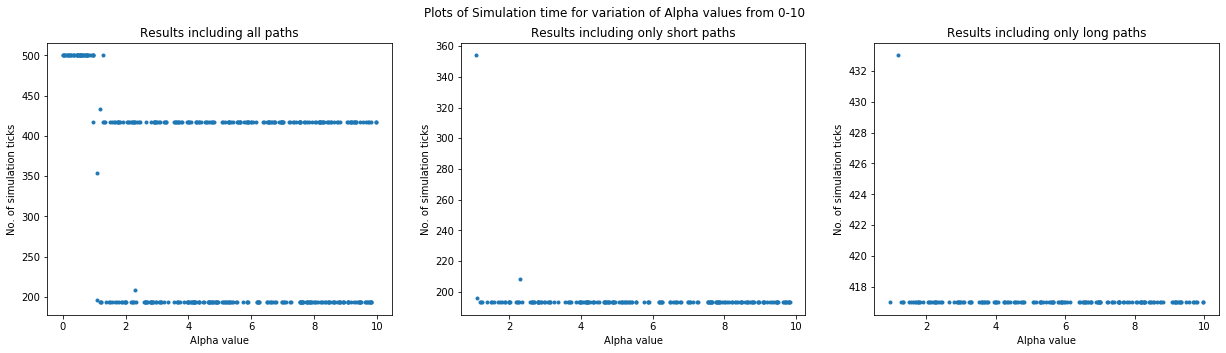

Percentage of sucessful path finding 47.25
Percentage of long path failure 42.0


In [581]:
# Initialising lists to seperate short and long results
alpha_short= []
alpha_long = []

# Seperating short and long results 
for i in range(N_alpha):
    if alpha_results[i,2] == 'short':
        alpha_short.append( alpha_results[i])
    if alpha_results[i,2] == 'long':
        alpha_long.append( alpha_results[i])
        
# Converting to array
alpha_short  = np.array(alpha_short)
alpha_long   = np.array(alpha_long)

# Plotting results
fig, ax= plt.subplots(1,3, figsize=(21,5))
fig.suptitle('Plots of Simulation time for variation of Alpha values from 0-10')

# Results for all paths
ax[0].plot(alpha_results[:,0], alpha_results[:,1], '.')
ax[0].set_xlabel('Alpha value')
ax[0].set_ylabel('No. of simulation ticks')
ax[0].set_title('Results including all paths')

# Results for short paths
if len(alpha_short)!=0:
    ax[1].plot(alpha_short[:,0], alpha_short[:,1], '.')
    ax[1].set_xlabel('Alpha value')
    ax[1].set_ylabel('No. of simulation ticks')
    ax[1].set_title('Results including only short paths')

# Results for long path
if len(alpha_long)!=0:
    ax[2].plot(alpha_long[:,0], alpha_long[:,1], '.')
    ax[2].set_xlabel('Alpha value')
    ax[2].set_ylabel('No. of simulation ticks')
    ax[2].set_title('Results including only long paths')

plt.show()

print('Percentage of sucessful path finding', 100*len(alpha_short)/N_alpha )
print('Percentage of long path failure', 100*len(alpha_long)/N_alpha )

#### Functionalising two path code with depression value:
- Turned two path model into a function that can be called and run for different values of grid size, pheromone, diffusion, ant numbers, etc.
- This functiin runs using depression value that varies probability function with time, this is to compare the alpha implimentation with the depression implimentation

In [447]:
# 14/03/21

def AntOptimisation(x0, y0, grd_x, grd_y, phero, pmax, pdiff, pdeprss, t_T, tol, Nants, add_ants):
    '''Function to evaluate two path system using depression value for the probability function.
    Takes in the various variables
    Returns:
    solved-    Boolean for if solution is found 
    solution-  The solution that is found(long/short)
    t-         Time taken
    grid-      The grid array at end of simulation'''
    
    # Initialising grid
    grid = np.zeros([grd_y,grd_x])

    # Initialising path- use tuples as easier to use to index, in form (y,x)
    short = ptp((0,0),(y0,x0))
    long  = ptp((0,0),(y0,0)) + ptp((y0,0),(y0,x0))[1:]

    # Initialising time variables
    dt  = 0.001
    t   = 0
    solved = False
    solution = 'null'

    # Initialising sites array with positions and arrays of paths away
    sites = {'nest': {
             'pos' : short[0],
              0    : short,
              1    : long },  

             'food': {
             'pos' : short[::-1][0],
              0    : short[::-1],
              1    : long[::-1] } }

    # Setting pheromone on grid for paths in sites, and set site positions to max pheromone
    for values in sites.values():
        for paths in range(len(values.keys())-1):
            for i in values[paths]:
                grid[i]= phero

        grid[values['pos']]= pmax    

    # Setting up ant colony for Nants ants 
    colony = add_colony({}, Nants, 'nest', sites)


    while t < t_T and solved==False :
        # Counts time
        t += 1
        #print(t)

        # Adds ant each tick
        colony = add_colony(colony, add_ants, 'nest', sites)

        # Reduces pheromone level by diffusion rate
        grid *= pdiff       

        # Ensures site positions are pheromone max
        grid[sites['nest']['pos']]= pmax
        grid[sites['food']['pos']]= pmax

        # Loops for all ants
        for n,ant in colony.items():
            # For all sites 
            for site in sites.values():
                # If ant is at the site
                if ant['pos'] == site['pos']:  
                    # Picks next path
                    nxt_path = path_choice(site, grid, t/pdeprss)

                    # Set ants new path and position
                    ant['path'] = site[nxt_path]
                    ant['pos']  = site[nxt_path][1]

                    # Increase pheromone for cell  ant is in now, limit to make pheromone
                    if grid[ ant['pos']]< pmax:
                        grid[ ant['pos']]+= phero   

            # Otherwise, if not at site position updates to next position in ants path
            # Finds index in the path, the ant is at and adds one
            indx= ant['path'].index(ant['pos'])
            nxt_indx= indx + 1

            # Update ant position to the next index position 
            ant['pos'] = ant['path'][nxt_indx]

            # Updates pheromone, limit to max level
            if grid[ ant['pos']]< pmax:
                grid[ ant['pos']]+= phero 

        density_s = sum( map(lambda x: grid[x], sites['nest'][0][1:-1]) ) / len( sites['nest'][0][1:-1] )
        density_l = sum( map(lambda x: grid[x], sites['nest'][1][1:-1]) ) / len( sites['nest'][1][1:-1] )
        density_T = (density_s+density_l)
        #print(density_s/density_T )

        if density_s/density_T > tol and density_s >pmax*0.5 :
            solved   = True
            solution = 'short'

        if density_l/density_T > tol and density_l >pmax*0.5 :
            solved   = True
            solution = 'long'

    return solved, solution, t, grid

#### Varying depression value:
- We get much better convergence for depression value <50 results take around same time, above this the time linearly increases as results become more diffuse. Above, 200 the results dont converge on a solution.

In [598]:
# 14/03/21

# No. depression sims.
N_depress = 400

# Initialise variables for function
x0, y0, grd_x, grd_y, phero, pmax, pdiff, pdeprss, t_T, tol, Nants, add_ants =(
    30, 30, 31, 31, 1, 100, 0.85, 20, 500, 0.9, 30, 1)

# Inititalise array to hold solutions, dtype is an object as holds floats, booleans and strings
depress_results= np.zeros([N_alpha,4],dtype=object)
depress_grids  = np.zeros([N_alpha, grd_y, grd_x])

# Loop for N_depress sims.
for i in range(N_depress):
    
    # Randomly pick depression value such that 1<p<T_t
    p =  1+ (t_T-1)*np.random.random()
    
    # Runs for set alpha 
    solved, solution, t, grid = AntOptimisation(x0, y0, grd_x, grd_y, phero, pmax, pdiff, p, t_T, tol, Nants, add_ants)
    
    # Store results
    depress_results[i] = [p, t, solution, solved]
    depress_grids[i]   = grid   
    
    clear_output()
    print(i) 

399


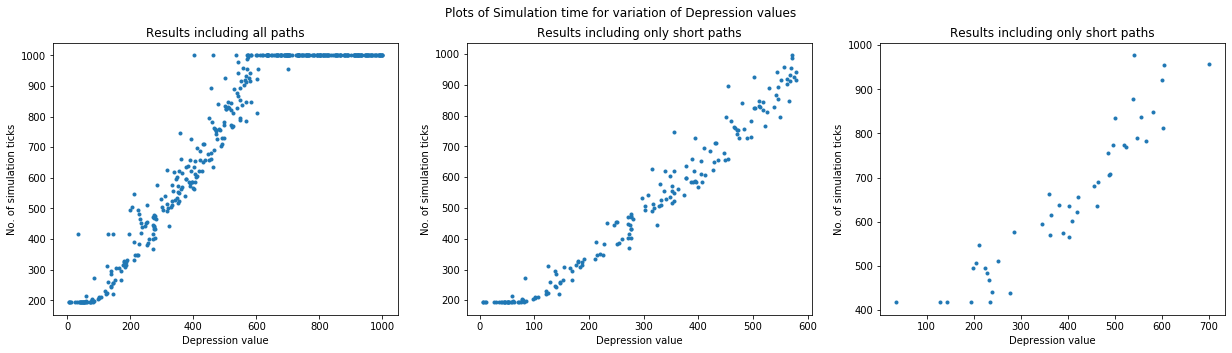

Percentage of sucessful path finding 45.5
Percentage of long path failure 11.5


In [599]:
# Initialising lists to seperate short and long results
depress_short= []
depress_long = []

# Seperating short and long results 
for i in range(N_depress):
    if depress_results[i,2] == 'short':
        depress_short.append( depress_results[i])
    if depress_results[i,2] == 'long':
        depress_long.append( depress_results[i])
        
# Converting to array
depress_short  = np.array(depress_short)
depress_long   = np.array(depress_long)

# Plotting results
fig, ax= plt.subplots(1,3, figsize=(21,5))
fig.suptitle('Plots of Simulation time for variation of Depression values')

# Results for all paths
ax[0].plot(depress_results[:,0], depress_results[:,1], '.')
ax[0].set_xlabel('Depression value')
ax[0].set_ylabel('No. of simulation ticks')
ax[0].set_title('Results including all paths')

# Results for short paths
if len(depress_short)!=0:
    ax[1].plot(depress_short[:,0], depress_short[:,1], '.')
    ax[1].set_xlabel('Depression value')
    ax[1].set_ylabel('No. of simulation ticks')
    ax[1].set_title('Results including only short paths')

# Results for long path
if len(depress_long)!=0:
    ax[2].plot(depress_long[:,0], depress_long[:,1], '.')
    ax[2].set_xlabel('Depression value')
    ax[2].set_ylabel('No. of simulation ticks')
    ax[2].set_title('Results including only short paths')

plt.show()

print('Percentage of sucessful path finding', 100*len(depress_short)/N_depress )
print('Percentage of long path failure', 100*len(depress_long)/N_depress )

#### Results for varying path size
- We now look to see how path size varies the sim. first we vary path with a constant depression value.
- Expect it to be linear, we have linear relation but there is a split over the long and short path, not optimal

In [595]:
# 14/03/21

# No. path sims.
N_path = 400
N_grid = 101

# Initialise variables for function
grd_x, grd_y, phero, pmax, pdiff, pdeprss, t_T, tol, Nants, add_ants =(
    N_grid, N_grid, 1, 100, 0.9, 40, 1000, 0.9, 30, 1)

# Inititalise array to hold solutions
path_results= np.zeros([N_path,4],dtype=object)
path_grids  = np.zeros([N_path, grd_y, grd_x])

# Loop for N_alpha sims.
for i in range(N_path):
    
    # Randomly pick alpha value
    k = np.random.randint(2, N_grid)
    
    # Runs for set alpha 
    solved, solution, t, grid = AntOptimisation(
        k, k, grd_x, grd_y, phero, pmax, pdiff, pdeprss, t_T, tol, Nants, add_ants)
    
    # Store results
    path_results[i] = [k, t, solution, solved]
    path_grids[i]   = grid   
    
    clear_output()
    print(i)

399


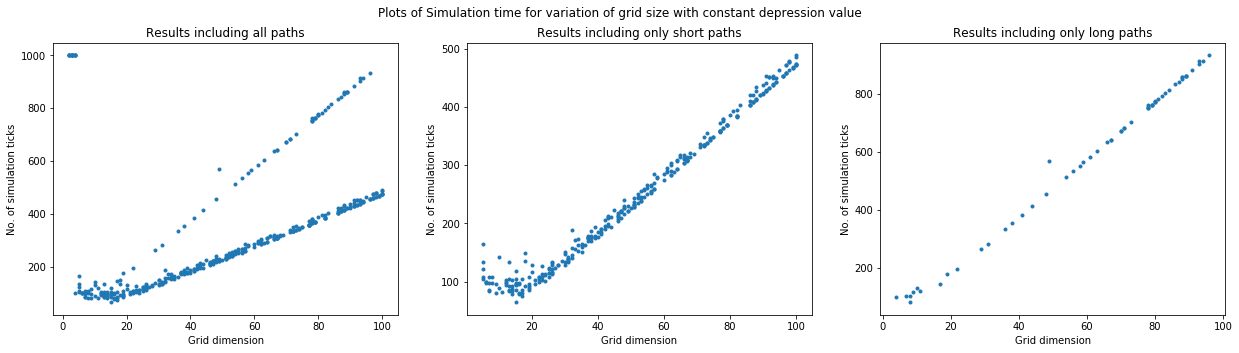

Percentage of sucessful path finding 81.75
Percentage of long path failure 14.75


In [596]:
# Initialising lists to seperate short and long results
path_short= []
path_long = []

# Seperating short and long results 
for i in range(N_path):
    if path_results[i,2] == 'short':
        path_short.append( path_results[i])
    if path_results[i,2] == 'long':
        path_long.append( path_results[i])
        
# Converting to array
path_short  = np.array(path_short)
path_long   = np.array(path_long)

# Plotting results
fig, ax= plt.subplots(1,3, figsize=(21,5))
fig.suptitle('Plots of Simulation time for variation of grid size with constant depression value' )

# Results for all paths
ax[0].plot(path_results[:,0], path_results[:,1], '.')
ax[0].set_xlabel('Grid dimension')
ax[0].set_ylabel('No. of simulation ticks')
ax[0].set_title('Results including all paths')

# Results for short paths
if len(path_short)!=0:
    ax[1].plot(path_short[:,0], path_short[:,1], '.')
    ax[1].set_xlabel('Grid dimension')
    ax[1].set_ylabel('No. of simulation ticks')
    ax[1].set_title('Results including only short paths')

# Results for long path
if len(path_long)!=0:
    ax[2].plot(path_long[:,0], path_long[:,1], '.')
    ax[2].set_xlabel('Grid dimension')
    ax[2].set_ylabel('No. of simulation ticks')
    ax[2].set_title('Results including only long paths')

plt.show()

print('Percentage of sucessful path finding', 100*len(path_short)/N_path )
print('Percentage of long path failure', 100*len(path_long)/N_path )

#### Results for varying depression constant with size
- This produces the linear relation as expected, unlike above, this produces better convergence on the small path, with higher percentage of success and no split.
- Using a linear fit, we see this scaleswith a gradient of 4

In [586]:
# 14/03/21

# No. path sims.
N_path2 = 400
N_grid = 101

# Initialise variables for function
grd_x, grd_y, phero, pmax, pdiff, pdeprss, t_T, tol, Nants, add_ants =(
    N_grid, N_grid, 1, 100, 0.9, 40, 500, 0.9, 30, 1)

# Inititalise array to hold solutions
path2_results= np.zeros([N_path2,4],dtype=object)
path2_grids  = np.zeros([N_path, grd_y, grd_x])

# Loop for N_alpha sims.
for i in range(N_path2):
    
    # Randomly pick alpha value
    k = np.random.randint(2, N_grid)
    
    # Runs for set alpha 
    solved, solution, t, grid = AntOptimisation(
        k, k, grd_x, grd_y, phero, pmax, pdiff, 1.7*k, t_T, tol, Nants, add_ants)
    
    # Store results
    path2_results[i] = [k, t, solution, solved]
    path2_grids[i]   = grid   
    
    clear_output()
    print(i)

399


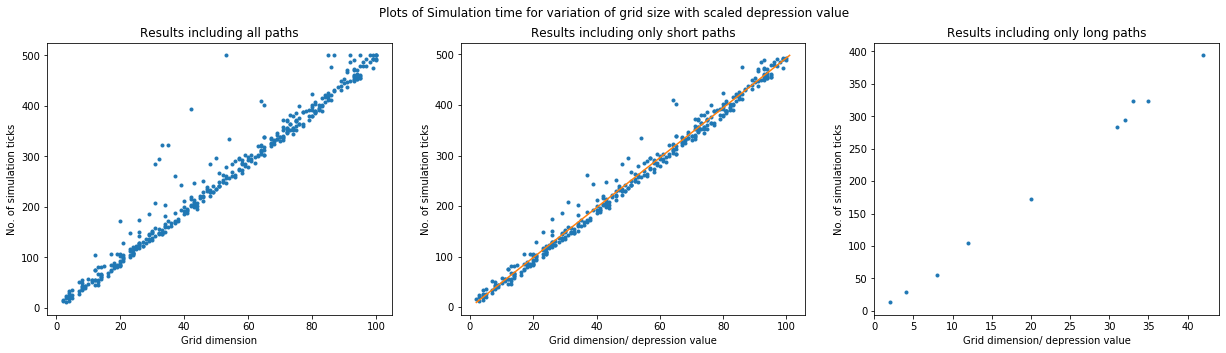

Percentage of sucessful path finding 95.0
Percentage of long path failure 2.5
Thus the scaling factor is  4.940752952735493


In [587]:
# Initialising lists to seperate short and long results
path2_short= []
path2_long = []

# Seperating short and long results 
for i in range(N_path2):
    if path2_results[i,2] == 'short':
        path2_short.append( path2_results[i])
    if path2_results[i,2] == 'long':
        path2_long.append( path2_results[i])
        
# Converting to array
path2_short  = np.array(path2_short)
path2_long   = np.array(path2_long)

# Plotting results
fig, ax= plt.subplots(1,3, figsize=(21,5))
fig.suptitle('Plots of Simulation time for variation of grid size with scaled depression value' )

# Results for all paths
ax[0].plot(path2_results[:,0], path2_results[:,1], '.')
ax[0].set_xlabel('Grid dimension')
ax[0].set_ylabel('No. of simulation ticks')
ax[0].set_title('Results including all paths')

# Results for short paths
if len(path2_short)!=0:
    fit = np.polyfit(path2_short[:,0].astype(float), path2_short[:,1].astype(float), 1)
    x = np.linspace(2,N_grid,100)

    ax[1].plot(path2_short[:,0], path2_short[:,1], '.')
    ax[1].plot(x, fit[0]*x + fit[1] )
    ax[1].set_xlabel('Grid dimension/ depression value')
    ax[1].set_ylabel('No. of simulation ticks')
    ax[1].set_title('Results including only short paths')

# Results for long path
if len(path2_long)!=0:
    ax[2].plot(path2_long[:,0], path2_long[:,1], '.')
    ax[2].set_xlabel('Grid dimension/ depression value')
    ax[2].set_ylabel('No. of simulation ticks')
    ax[2].set_title('Results including only long paths')

plt.show()

print('Percentage of sucessful path finding', 100*len(path2_short)/N_path2 )
print('Percentage of long path failure', 100*len(path2_long)/N_path2 )
print('Thus the scaling factor is ', fit[0])

#### Optimising scale factor of depression
- Plot percentage of sucess for varying scale factor
- Produce quadratic fit, using differential, find the maxima value, thus optimal scaling

In [655]:
# 14/03/21

# Set function values
grd_x, grd_y, phero, pmax, pdiff, pdeprss, t_T, tol, Nants, add_ants = (41, 41, 1, 100, 0.9, 20, 500, 0.9, 40, 1)

# Set no. of total simulations
Ni = 100

# Max value of depression scale factor is set
Nj = 10

# No. of sims for each scale factor
Nk= 51

# Results array
j_result = np.zeros([Ni,3])

for i in range(Ni):
    # Sets scale factor
    j = 0.1 + Nj*np.random.random()
    
    # Initialise solution value
    n_short = 0
    n_long  = 0
    
    # Preforms Nk simulations for set scale factor
    for k in range(Nk):
        solved, solution, t, grid = AntOptimisation(
            40, 40, grd_x, grd_y, phero, pmax, pdiff, j*40, t_T, tol, Nants, add_ants)

        # Counts solution found
        if solution == 'short':
            n_short += 1
        if solution == 'long':
            n_long += 1  
            
    # Record results
    j_result[i] = [j, n_short/Nk, n_long/Nk ] 
    
    clear_output()
    print(i)

99


Fit parameters are [-0.02167089  0.09660751  0.89768017] and uncertainties are  [0.0015327472358230817, 0.01580631564080677, 0.03438915832070137] . Optimal value is 2.228969506218236 +/- 0.3973069095875362


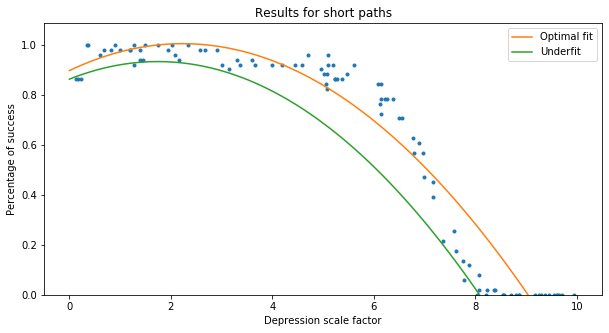

In [656]:
# Produce fit for data and uncertainties
fit1, cvm1 = np.polyfit(j_result[:,0], j_result[:,1],2, cov='scaled')
dfit1 = [np.sqrt(cvm1[i,i]) for i in range(3)]  

# Finds minima and finds uncertainty, using formula dZ = Z( (dA/A)^2 + (dB/B)^2 )^1/2
minima = -fit1[1]/(2*fit1[0] )
dminima= minima*np.sqrt( (dfit1[0]/fit1[0])**2 + (dfit1[1]/fit1[1])**2 )

# Produces x array to plot fit
x = np.linspace(0,Nj,100)

# Plot data
fig, ax= plt.subplots(1,1, figsize=(10,5))

# Plot results
ax.plot(j_result[:,0], j_result[:,1], '.')

# Plot fits
ax.plot(x, fit1[0]*x**2 + fit1[1]*x + fit1[2], label = 'Optimal fit' )
ax.plot(x, (fit1[0]-dfit1[0])*x**2 + (fit1[1]-dfit1[1])*x + (fit1[2]-dfit1[2]), label = 'Underfit' )
ax.set_ylim(0)

# Set labels 
ax.set_xlabel('Depression scale factor')
ax.set_ylabel('Percentage of success')
ax.set_title('Results for short paths')
ax.legend()

print('Fit parameters are', fit1, 'and uncertainties are ',dfit1, '. Optimal value is', minima, '+/-', dminima  )

#### Varying dispersion value
- Here we look at sim. time for varying diffusion value, we see an hyperbolic relation, showiing optimal diffusion value is approx. 0.9

In [855]:
# 14/03/21

# No. path sims.
N_diff = 400

# Initialise variables for function
x0, y0, grd_x, grd_y, phero, pmax, pdiff, pdeprss, t_T, tol, Nants, add_ants =( 
    30, 30, 31, 31, 1, 100, 0.9, 40, 700, 0.9, 30, 1)

# Inititalise array to hold solutions
diff_results= np.zeros([N_path,4],dtype=object)
diff_grids  = np.zeros([N_path, grd_y, grd_x])

# Loop for N_alpha sims.
for i in range(N_diff):
    
    # Randomly pick alpha value
    k = 0.1 + 0.98*np.random.random()
    
    # Runs for set alpha 
    solved, solution, t, grid = AntOptimisation(
        x0, y0, grd_x, grd_y, phero, pmax, k, 2*x0, t_T, tol, Nants, add_ants)
    
    # Store results
    diff_results[i] = [k, t, solution, solved]
    diff_grids[i]   = grid   
    
    clear_output()
    print(i)

399


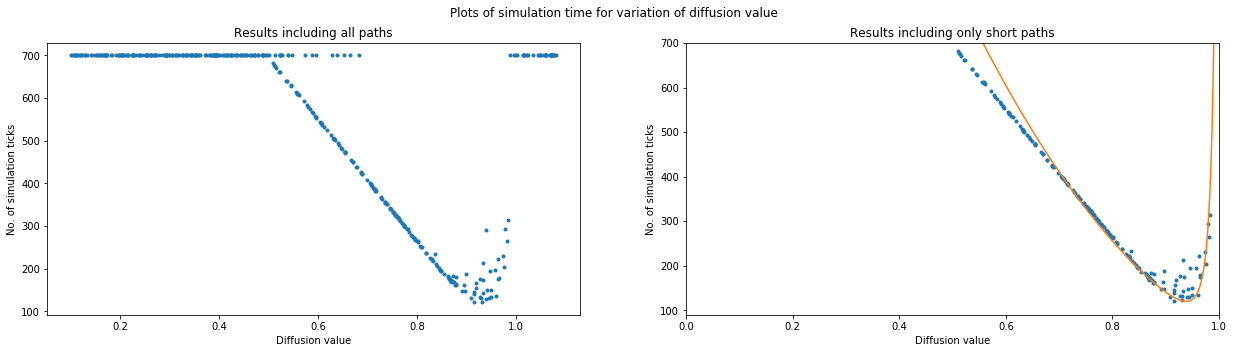

Percentage of sucessful path finding 43.0
Percentage of long path failure 0.25


In [858]:
# Initialising lists to seperate short and long results
diff_short= []
diff_long = []

# Seperating short and long results 
for i in range(N_diff):
    if diff_results[i,2] == 'short':
        diff_short.append( diff_results[i])
    if diff_results[i,2] == 'long':
        diff_long.append( diff_results[i])
        
# Converting to array
diff_short  = np.array(diff_short)
diff_long   = np.array(diff_long)

# Curve to overlay
def curve( x, a, b, c, d, e ):
    return (1/(a*(x+c)) + b*(x+c)+d)**2 + e
x = np.linspace(0,1,1000)

# Plotting results
fig, ax= plt.subplots(1,2, figsize=(21,5))
fig.suptitle('Plots of simulation time for variation of diffusion value' )

# Results for all paths
ax[0].plot(diff_results[:,0], diff_results[:,1], '.')
ax[0].set_xlabel('Diffusion value')
ax[0].set_ylabel('No. of simulation ticks')
ax[0].set_title('Results including all paths')

# Results for short paths
if len(diff_short)!=0:
    # Data plotted
    ax[1].plot(diff_short[:,0], diff_short[:,1], '.')
    
    # Overlayed line plotted
    ax[1].plot(x, curve(x, -1.7, 45, -1.01, -5, 120) )
    ax[1].set_xlim(0.,1.) 
    ax[1].set_ylim(90,700)   
    ax[1].set_xlabel('Diffusion value')
    ax[1].set_ylabel('No. of simulation ticks')
    ax[1].set_title('Results including only short paths')

plt.show()

print('Percentage of sucessful path finding', 100*len(diff_short)/N_diff )
print('Percentage of long path failure', 100*len(diff_long)/N_diff )

### Day: 15/03/21:Optimising TSP:

#### Function for TSP 

In [14]:
# 15/03/21
def TSP_optimise(pdiff, t_T, Nants, alpha, beta ,gamma):

    # Initialising grid
    grd_x= 18
    grd_y= 18
    grid = np.zeros([grd_y,grd_x])

    # Initialising pheromone variables
    phero   = 1
    pmax    = 100

    # Initialising time variables
    dt  = 0.001
    t   = 0

    solution = 'null'
    solved = False
    tol = 0.9

    # Initialising sites, node positions in form (y,x)
    nd0 = (0,0)
    nd1 = (11,0)
    nd2 = (0,11)
    nd3 = (7,7)
    nd4 = (14,16)
    nd5 = (17,2) 

    # Setting up array of node and edges to intialise sites
    loc   = (nd0, nd1, nd2, nd3, nd4, nd5)
    links = ('node0_1', 'node0_2', 'node0_3', 'node1_3', 'node1_4', 'node1_5', 'node2_3', 'node2_4', 'node3_4', 
             'node3_5', 'node3_5', 'node4_5')

    # Call function to set up sites
    sites = graph(loc, links)

    # Initialise values
    correct_path = (sites['node0']['node1'][1:-1] + sites['node1']['node5'][1:-1] + sites['node5']['node4'][1:-1] +
                    sites['node4']['node3'][1:-1] + sites['node3']['node2'][1:-1] + sites['node2']['node0'][1:-1])

    other_path =  ( sites['node3']['node0'][1:-1] + sites['node3']['node1'][1:-1] +  sites['node3']['node5'][1:-1] 
                  + sites['node2']['node4'][1:-1] + sites['node1']['node4'][1:-1] )


    # Setting up ant colony for Nants ants 
    for site in sites.keys():
        colony = add_colony_SM(  {}  , Nants, site, sites)

    # Setting pheromone on grid for paths in sites 
    for site in sites.values():
        for edge in list(site.values())[1:]:
            for i in edge:
                grid[i]= phero

    # Set site positions to max pheromone
    for site in sites.values():
        grid[site['pos']]= pmax  

    # Main loop
    while t < t_T and solved == False:
        # Counts time
        t += 1

        # Adds ant each tick
        colony = add_colony_SM(colony, 5, 'node'+ str(np.random.randint(len(loc))), sites)

        # Reduces pheromone level by diffusion rate
        grid *= pdiff   

        # Ensures site positions are pheromone max
        for values in sites.values():        
            grid[values['pos']]= pmax 

        # Loops for all ants, n
        for n, ant in colony.items():

            # For each node in sites dictonary 
            for node, site in sites.items():

                # If ant is at the site
                if ant['pos'] == site['pos']:

                    # Removes site from available locations
                    if node in ant['sites']: 
                        ant['sites'].remove(node)

                    # Remove pos from the retrace
                    ant['stops'].remove(site['pos'])

                    # If ant has been all sites
                    if len(ant['sites']) == 0:

                        # If its back at the start of its tour, will reset the ant
                        if ant['pos'] == ant['start']:                       
                            # Resets ant variables that changed during tour
                            ant['stops'] = [site['pos']]
                            ant['path']  = (ant['pos'],)
                            ant['sites'] = list (sites.keys())

                             # -1 as next index of path needs to be 0, as this keeps ant in cell to restart tour
                            ant['index'] = -1

                        else:
                            # Retraces steps, retrace path doesn't contain any sites except start
                            # So once set will not re-enter this loop before resetting

                            # Reverse stops visited and add start point at end to create new path
                            retrace= ant['stops'][::-1]
                            retrace.append(ant['start'])

                            # Set path to follow as the retrace
                            ant['path'] = tuple(retrace)
                            ant['pos']  = ant['path'][0]

                            # Reset index for path
                            ant['index'] = 0

                    # If ant hasn't been all sites
                    else:
                        # Picks next path
                        nxt_path = path_choice_SM(site, ant, grid, alpha, beta, gamma)

                        # Set ants new path and position and adds the pos to stops list
                        ant['path'] = site[nxt_path]
                        ant['pos']  = site[nxt_path][1]
                        ant['stops']. append(ant['pos'])

                        # Set path index
                        ant['index'] = 1                

            # Ants not at node follow there path    
            # Loops to next path index
            ant['index'] += 1

            # Update ant position to the next index position, and adds the pos to stops list
            ant['pos'] = ant['path'][ant['index']]
            ant['stops'].append(ant['pos'])

            # Updates pheromone, limit to max level when retracing
            if grid[ ant['pos']]< pmax and len(ant['sites']) == 0 :
                grid[ ant['pos']]+= phero 

        density_c = sum( map(lambda x: grid[x], correct_path)) / len(correct_path)
        density_o = sum( map(lambda x: grid[x], other_path  )) / len(other_path)
        density_T = density_c + density_o

        # print(density_c, density_o, density_c/density_T)

        if density_c/density_T > tol and density_c > pmax*0.5 :
            solved   = True
            solution = 'Found'

    return solution, t, grid

#### Optimising for  diffusion/ evaporation rate
- Same aysomptotic relation as seen with the simple model above

In [836]:
# 15/03/21
N_pdiff= 100
grd_x= 18
grd_y= 18
pdiff, t_T, Nants, alpha, beta ,gamma =( 0.75, 1000, 50, 2, 3, 30)

pdiff_results= np.zeros([N_pdiff,3], dtype=object)
pdiff_grid= np.zeros([N_pdiff, grd_y, grd_x])

for pdiff in range(N_pdiff):
    
    i = np.random.random()
    solution, t, grid = TSP_optimise(i, t_T, Nants, alpha, beta ,gamma)
    
    pdiff_results[pdiff] = [i, t, solution]
    pdiff_grid[pdiff]     = grid   
    
    clear_output()
    print(pdiff)

99


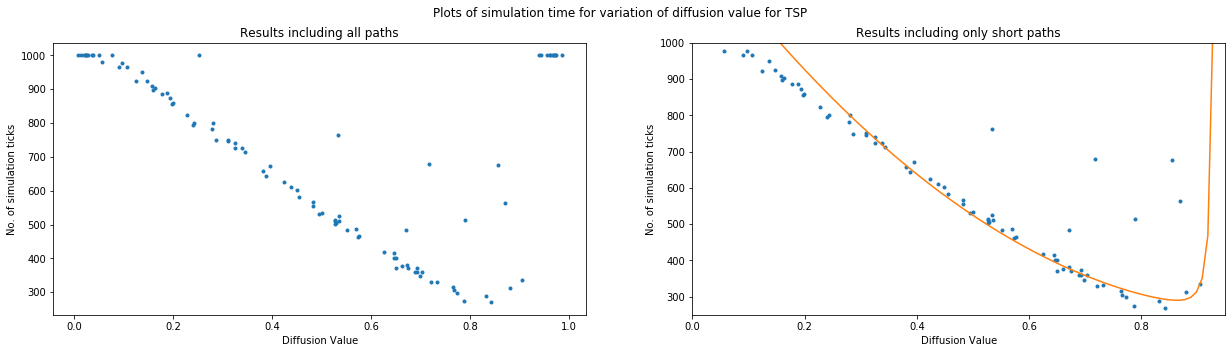

Percentage of sucessful path finding 77.0


In [848]:
# Sorting successful solution
pdiff_success= []

# Sorting successful solutions
for i in range(N_pdiff):
    if pdiff_results[i,2] == 'Found':
        pdiff_success.append( pdiff_results[i])

# Turning the lis to an array        
pdiff_success  = np.array(pdiff_success)

# Defining curve to plot over the data
def curve( x, a, b, c, d, e ):
    return (1/(a*(x+c)) + b*(x+c)+d)**2 + e

# Define x array to plot fit
x = np.linspace(0,1,100)

# Plot data
fig, ax= plt.subplots(1, 2, figsize=(21,5))
fig.suptitle('Plots of simulation time for variation of diffusion value for TSP' )

# Plot raw data
ax[0].plot(pdiff_results[:,0], pdiff_results[:,1], '.')
ax[0].set_xlabel('Diffusion Value')
ax[0].set_ylabel('No. of simulation ticks')
ax[0].set_title('Results including all paths')

# Plot only successful solutions
if len(pdiff_success) != 0:
    # Plot data and curve
    ax[1].plot(pdiff_success[:,0], pdiff_success[:,1], '.')
    ax[1].plot(x, curve(x,-3, 32, -0.94, -2, 290))
               
    # Set limits of domain and range
    ax[1].set_ylim(250,1000)    
    ax[1].set_xlim(0,0.95)
    
    ax[1].set_xlabel('Diffusion Value')
    ax[1].set_ylabel('No. of simulation ticks')
    ax[1].set_title('Results including only short paths')

plt.show()

print('Percentage of sucessful path finding', 100*len(pdiff_success)/N_pdiff )

#### Varying gamma:
- Looking to optimise gamma, there no particular trend shown

In [827]:
# 15/03/21
N_gamma= 100
grd_x= 18
grd_y= 18
pdiff, t_T, Nants, alpha, beta ,gamma =( 0.75, 1000, 50, 2, 3, 30)

gamma_results= np.zeros([N_gamma,3], dtype=object)
gamma_grid= np.zeros([N_gamma, grd_y, grd_x])

for gamma in range(N_gamma):
    
    i = 100*np.random.random()
    solution, t, grid = TSP_optimise(pdiff, t_T, Nants, alpha, beta ,i)
    
    gamma_results[gamma] = [i, t, solution]
    gamma_grid[gamma]    = grid   
    
    clear_output()
    print(gamma)

99


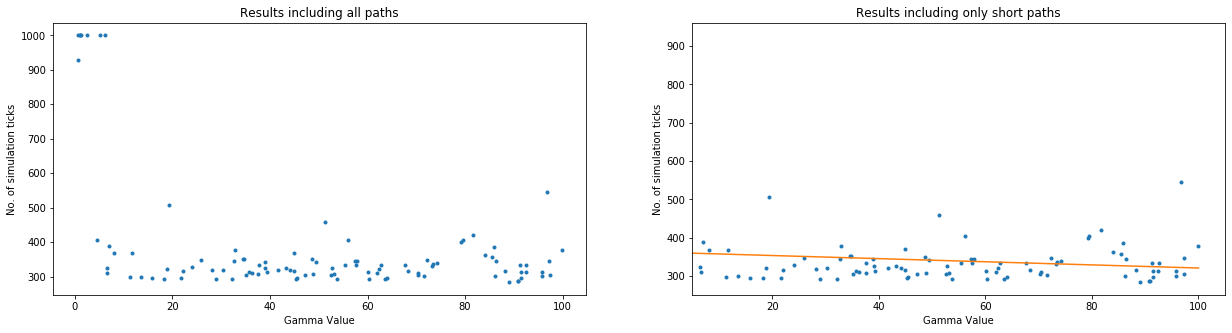

Percentage of sucessful path finding 93.0


In [868]:
# Sorting successful solution
gamma_success= []

# Sorting successful solutions
for i in range(N_gamma):
    if gamma_results[i,2] == 'Found':
        gamma_success.append( gamma_results[i])

# Turning the lis to an array        
gamma_success  = np.array(gamma_success)

# Fitting data
fit1, cvm1 = np.polyfit(gamma_success[:,0].astype(int), gamma_success[:,1].astype(int), 1, cov='scaled')
dfit1 = [np.sqrt(cvm1[i,i]) for i in range(2)]  
x = np.linspace(0,N_gamma,100)

# Plot data
fig, ax= plt.subplots(1, 2, figsize=(21,5))

# Plot raw data
ax[0].plot(gamma_results[:,0], gamma_results[:,1], '.')
ax[0].set_xlabel('Gamma Value')
ax[0].set_ylabel('No. of simulation ticks')
ax[0].set_title('Results including all paths')

# Plot only successful solutions
if len(gamma_success) != 0:
    # Plot data and curve
    ax[1].plot(gamma_success[:,0], gamma_success[:,1], '.')
    ax[1].plot(x, fit1[0]*x + fit1[1])
    ax[1].set_xlim(5)
  
    ax[1].set_xlabel('Gamma Value')
    ax[1].set_ylabel('No. of simulation ticks')
    ax[1].set_title('Results including only short paths')

plt.show()

print('Percentage of sucessful path finding', 100*len(gamma_success)/N_gamma )

#### Varying alpha:
- lookin to optimise alpha, gives exponential curve

In [870]:
# 15/03/21
N_alphaTSP= 100
grd_x= 18
grd_y= 18
pdiff, t_T, Nants, alpha, beta ,gamma =( 0.75, 1000, 50, 2, 3, 30)

alphaTSP_results= np.zeros([N_alphaTSP,3], dtype=object)
alphaTSP_grid= np.zeros([N_alphaTSP, grd_y, grd_x])

for alphaTSP in range(N_alphaTSP):
    
    i = 10*np.random.random()
    solution, t, grid = TSP_optimise(pdiff, t_T, Nants, i, beta ,gamma)
    
    alphaTSP_results[alphaTSP] = [i, t, solution]
    alphaTSP_grid[alphaTSP]    = grid   
    
    clear_output()
    print(alphaTSP)

99


Fitting parameters are [ 1.07678924e+04 -3.63875286e+00  2.90350869e+02]


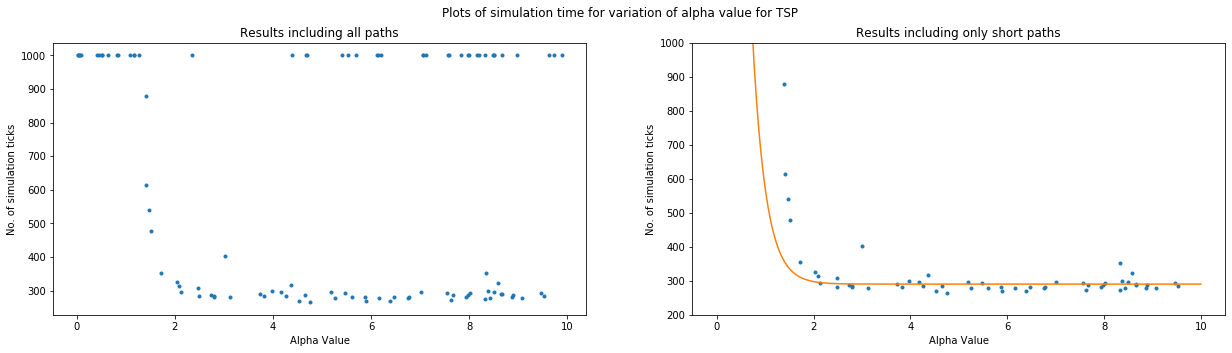

Percentage of sucessful path finding 55.0


In [915]:
# Import for fitting
from scipy.optimize import curve_fit

# Sorting successful solution
alphaTSP_success= []

# Sorting successful solutions
for i in range(N_alphaTSP):
    if alphaTSP_results[i,2] == 'Found':
        alphaTSP_success.append( alphaTSP_results[i])

# Turning the lis to an array        
alphaTSP_success  = np.array(alphaTSP_success)

# Defining curve to plot over the data
def curve( x, a, b, c ):
    return a*np.exp(b*x)+c

c1, c2 = curve_fit(curve, alphaTSP_success[:,0].astype(int), alphaTSP_success[:,1].astype(int), p0=[600,-1.8,1000])
print('Fitting parameters are',c1)
a,b,c = c1

# Define x array to plot fit
x = np.linspace(0, 10,1000)

# Plot data
fig, ax= plt.subplots(1, 2, figsize=(21,5))
fig.suptitle('Plots of simulation time for variation of alpha value for TSP' )

# Plot raw data
ax[0].plot(alphaTSP_results[:,0], alphaTSP_results[:,1], '.')
ax[0].set_xlabel('Alpha Value')
ax[0].set_ylabel('No. of simulation ticks')
ax[0].set_title('Results including all paths')

# Plot only successful solutions
if len(alphaTSP_success) != 0:
    # Plot data and curve
    ax[1].plot(alphaTSP_success[:,0], alphaTSP_success[:,1], '.')
    ax[1].plot(x, curve(x, a, b, c) )
    ax[1].set_ylim(200,1000)
    ax[1].set_xlabel('Alpha Value')
    ax[1].set_ylabel('No. of simulation ticks')
    ax[1].set_title('Results including only short paths')

plt.show()

print('Percentage of sucessful path finding', 100*len(alphaTSP_success)/N_alphaTSP )

#### Varying beta:
- No optimal value shown

In [916]:
# 15/03/21
N_beta= 100
grd_x= 18
grd_y= 18
pdiff, t_T, Nants, alpha, beta ,gamma = (0.75, 1000, 50, 2, 3, 30)

beta_results= np.zeros([N_beta,3], dtype=object)
beta_grid= np.zeros([N_beta, grd_y, grd_x])

for beta in range(N_beta):

    i = 10*np.random.random()
    solution, t, grid = TSP_optimise(pdiff, t_T, Nants, alpha, i ,gamma)
    
    beta_results[beta] = [i, t, solution]
    beta_grid[beta]    = grid   
    
    clear_output()
    print(beta)

99


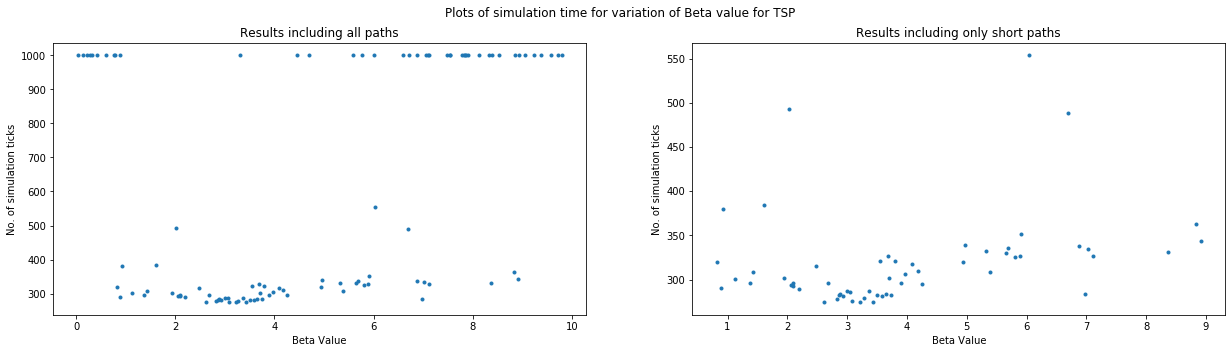

Percentage of sucessful path finding 58.0


In [917]:
# Sorting successful solution
beta_success= []

# Sorting successful solutions
for i in range(N_beta):
    if beta_results[i,2] == 'Found':
        beta_success.append(beta_results[i])

# Turning the lis to an array        
beta_success  = np.array(beta_success)

# Plot data
fig, ax= plt.subplots(1, 2, figsize=(21,5))
fig.suptitle('Plots of simulation time for variation of Beta value for TSP' )

# Plot raw data
ax[0].plot(beta_results[:,0], beta_results[:,1], '.')
ax[0].set_xlabel('Beta Value')
ax[0].set_ylabel('No. of simulation ticks')
ax[0].set_title('Results including all paths')

# Plot only successful solutions
if len(beta_success) != 0:
    # Plot data and curve
    ax[1].plot(beta_success[:,0], beta_success[:,1], '.')
    ax[1].set_xlabel('Beta Value')
    ax[1].set_ylabel('No. of simulation ticks')
    ax[1].set_title('Results including only short paths')

plt.show()

print('Percentage of sucessful path finding', 100*len(beta_success)/N_beta )

#### Varying alpha and beta
- As they are not independent well look to see what the two varying produce,
- Using differential calculus we finf the minima from the optimised fit produced

In [888]:
# 15/03/21
N_ab = 20
grd_x= 18
grd_y= 18

pdiff, t_T, Nants, alpha, beta, gamma = (0.85, 1000, 50, 2, 3, 30)

ab_results= results= np.zeros([N_ab**2,4],dtype=object)
ab_grid   = np.zeros([N_ab**2, grd_y, grd_x])

ab = 0

for a in range(N_ab):
    a*=0.5
    for b in range(N_ab): 
        b*=0.5
        
        solution, t, grid    = TSP_optimise( pdiff, t_T, Nants, a, b, gamma)
        ab_results[ab]  = [a, b, t, solution]
        grid_results[ab]= grid   
        
        ab += 1
        
        clear_output()
        print(ab)

400


In [954]:
# 15/03/21
import scipy

data=[]

for i in range(N_ab**2):
    if ab_results[i,3] == 'Found':
        indata= [ ab_results[i,0],  ab_results[i,1], ab_results[i,2]]
        data.append(indata)
data = np.array(data)

# Regular grid covering the domain of the data
mn = np.min(data, axis=0)
mx = np.max(data, axis=0)

# Create grid
X,Y = np.meshgrid(np.linspace(mn[0], mx[0], 20), np.linspace(mn[1], mx[1], 20))

# Get x/y as 1d
X0 = X.flatten()
Y0 = Y.flatten()

# Find fit
A = np.c_[np.ones(data.shape[0]), data[:,:2], np.prod(data[:,:2], axis=1), data[:,:2]**2]
C,_,_,_ = scipy.linalg.lstsq(A, data[:,2])
    
# Evaluate function to plot
Z= C[0] + C[1]*X + C[2]*Y + C[3]*X*Y + C[4]*X**2 + C[5]*Y**2

minima = [0.5*( C[3]*C[2]-2*C[1]*C[5] )/( 4*C[4]*C[5]-C[3]**2 ), 0.5*( C[3]*C[1]-2*C[2]*C[4] )/( 4*C[4]*C[5]-C[3]**2 ) ]

print('Fit parameters are',C, 'Minima is at',minima)

Fit parameters are [ 563.23032254 -100.07567066  -14.42245296   -1.12787385    8.10790778
    1.75575125] Minima is at [3.3023544549435075, 3.11429814073698]


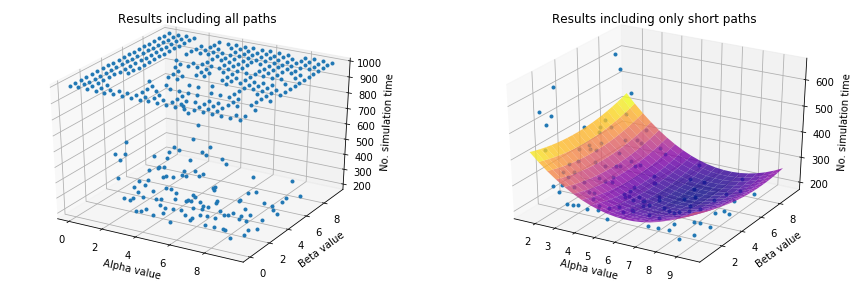

Percentage of sucessful path finding 27.75


In [952]:
# 15/03/21

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(121, projection='3d')
ax.plot(ab_results[:,0], ab_results[:,1] , ab_results[:,2], '.')
ax.set_xlabel('Alpha value')
ax.set_ylabel('Beta value')
ax.set_zlabel('No. simulation time')
ax.set_title('Results including all paths')

if len(ab_success) != 0 :
    ax1 = fig.add_subplot(122, projection='3d')
    ax1.plot(data[:,0], data[:,1], data[:,2], '.')
    ax1.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=0.8, cmap= 'plasma')
    
    ax1.set_xlabel('Alpha value')
    ax1.set_ylabel('Beta value')
    ax1.set_zlabel('No. simulation time')
    ax1.set_title('Results including only short paths')

plt.show()

print('Percentage of sucessful path finding', 100*len(ab_success)/N_ab**2 )

#### Optimised values:
- Test the percentage success of optimisation

In [956]:
# 15/03/21
# Runs test on optimal values found for tsp problem 
results= np.zeros([100,2], dtype=object)

for i in range(100): 
    solution, t, grid    = TSP_optimise( 0.9, 1000, 50, 3.3, 3.1, 30)
    results[i]  = [t, solution]
    
    
    clear_output()
    print(i)

success=[]
for i in range(100):
    if results[i,1] == 'Found':
        success.append(results[i])
           
print( len(success)/100)

99
0.88


In [946]:
# 15/03/21

#Test optimal values for simple solution

# Initialise variables for function
x0, y0, grd_x, grd_y, phero, pmax, pdiff, pdeprss, t_T, tol, Nants, add_ants =(
    40, 40, 41, 41, 1, 100, 0.9, 1.89*40, 500, 0.9, 30, 1)

# Inititalise array to hold solutions
results2
success_percent=0

# Loop for N_alpha sims.
for i in range(1000):
        
    # Runs for set alpha 
    solved, solution, t, grid = AntOptimisation(
        x0, y0, grd_x, grd_y, phero, pmax, pdiff, pdeprss, t_T, tol, Nants, add_ants)
    
    # Store results
    results2 += t

    if solution == 'short':
        success_percent+=1
        
    clear_output()
    print(i)    
    
print(len(success_percent)/400)

399
0.9825
